## Importing libraries

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report,RocCurveDisplay
from imblearn.pipeline import Pipeline
from collections import Counter

## Importing dataset

In [4]:
# loading the dataset
df=pd.read_csv(r'C:\Users\rsaty\OneDrive\Desktop\Final Projects\HR-Employee-Attrition.csv')

## Basic ckecks

In [6]:
# displaying the first 5 rows
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [7]:
# displaying the last 5 rows
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [8]:
# displaying the number of rows and columns in the dataset
df.shape

(1470, 35)

In [9]:
# displaying the datatypes of the respective columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
# displaying the list of all the columns in the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# displaying the statistical details of the numerical columns
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [12]:
# calculating the total number of duplicate rows present in the dataset
df.duplicated().sum()

0

In [13]:
# calculating the number of missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
# removing the columns consisting of constant value across all the rows
df=df.loc[:,df.nunique()>1]

## Exploratory Data Analysis

In [16]:
# filtering for categorical features
categorical=[col for col in df.columns if df[col].dtype=='O']

In [17]:
print('List of categorical features is as follows: \n {}'.format(categorical))
print('Length (number)of categorical features is {}'.format(len(categorical)))

List of categorical features is as follows: 
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Length (number)of categorical features is 8


In [18]:
# filtering for numerical features
numerical=[colum for colum in df.columns if df[colum].dtype!='O']

In [19]:
print('List of numerical features: \n \n {}'.format(numerical))
print(f'\n Number(length) of numerical features is {len(numerical)}')

List of numerical features: 
 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

 Number(length) of numerical features is 24


## Univariate Analysis

#### Numerical features

Analysis of Age: 

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

 Missing values are: 0




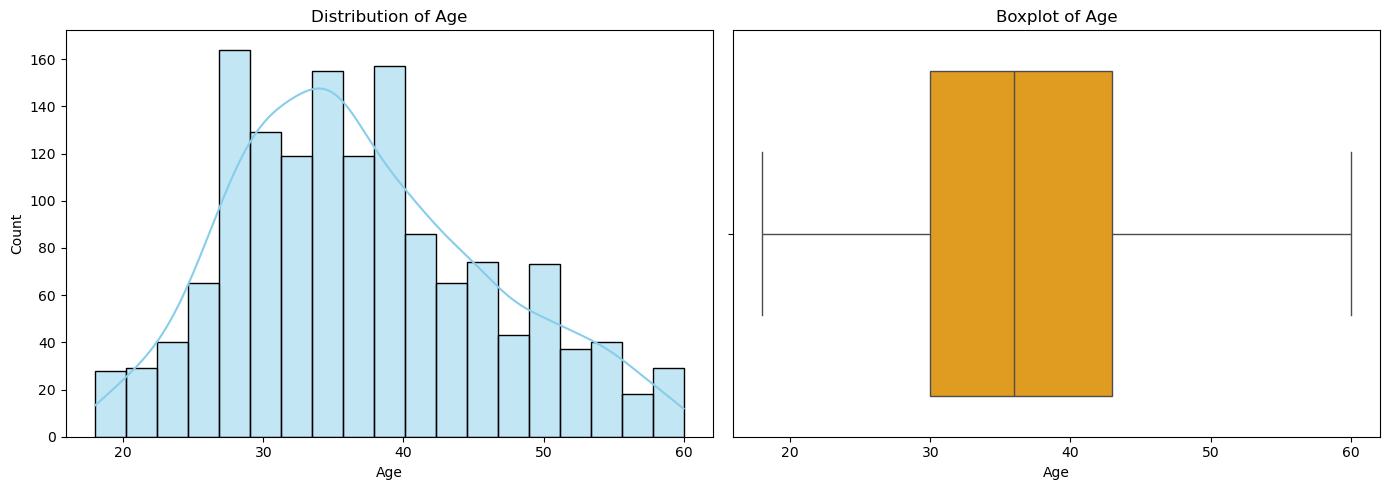

--------------------------------------------------
Analysis of DailyRate: 

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

 Missing values are: 0




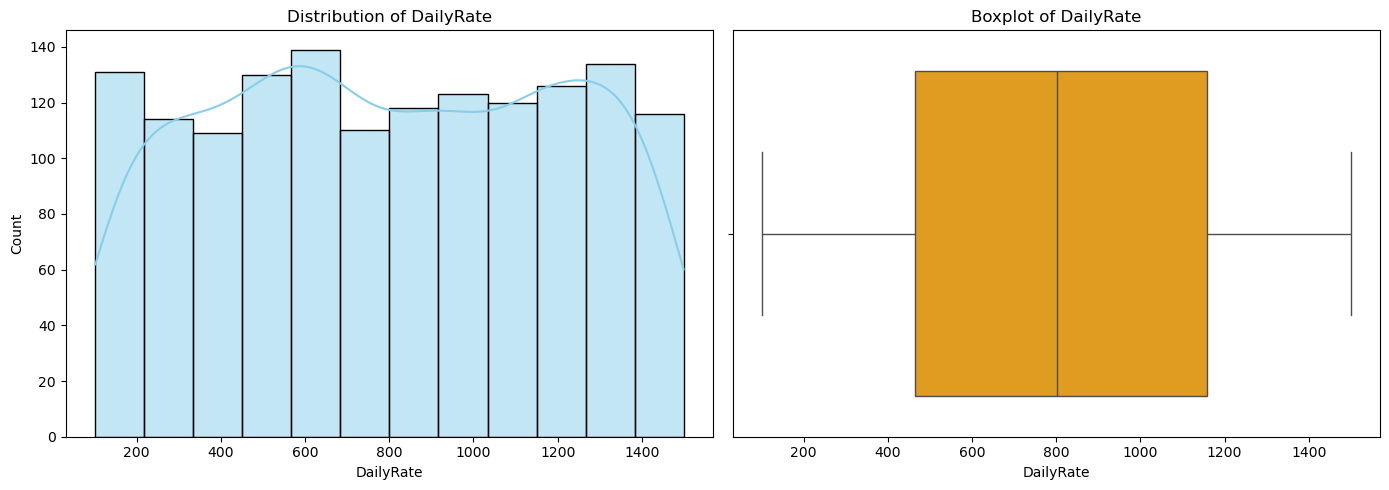

--------------------------------------------------
Analysis of DistanceFromHome: 

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

 Missing values are: 0




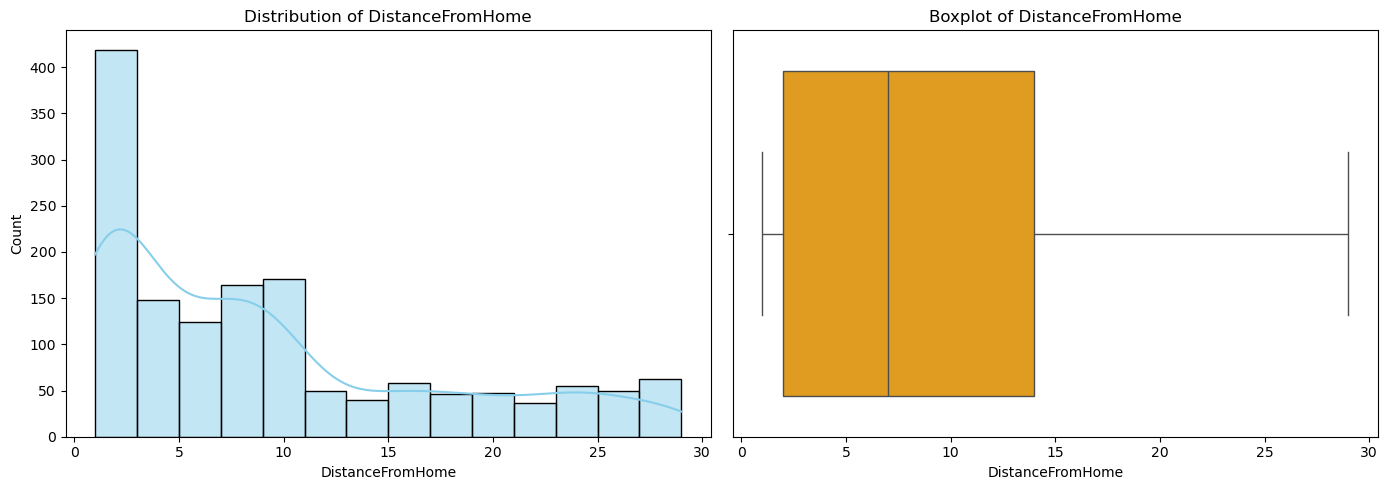

--------------------------------------------------
Analysis of Education: 

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

 Missing values are: 0




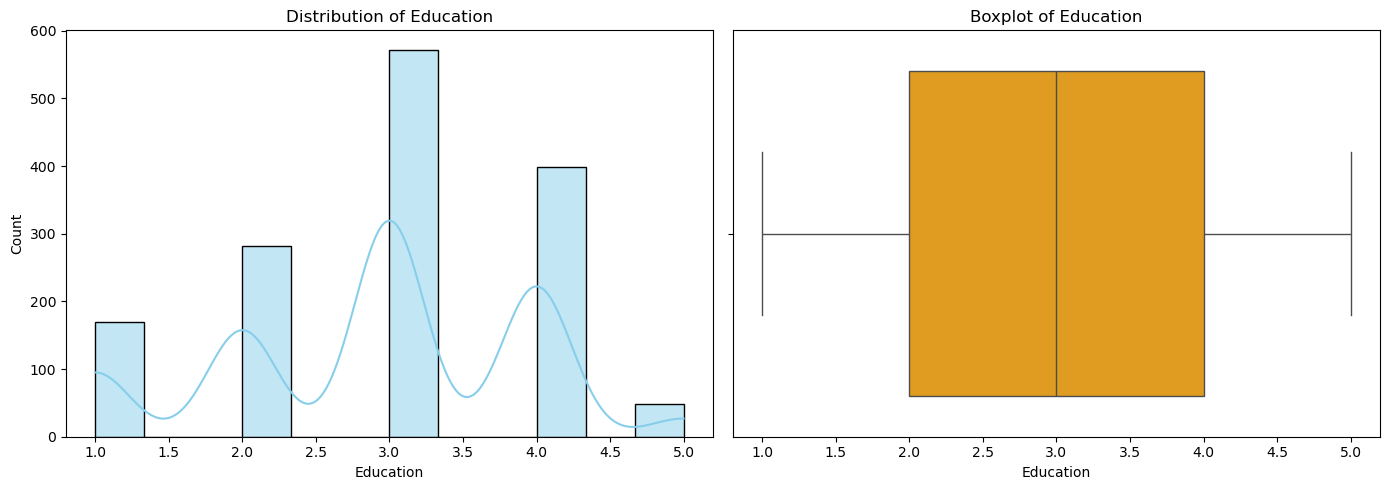

--------------------------------------------------
Analysis of EmployeeNumber: 

count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64

 Missing values are: 0




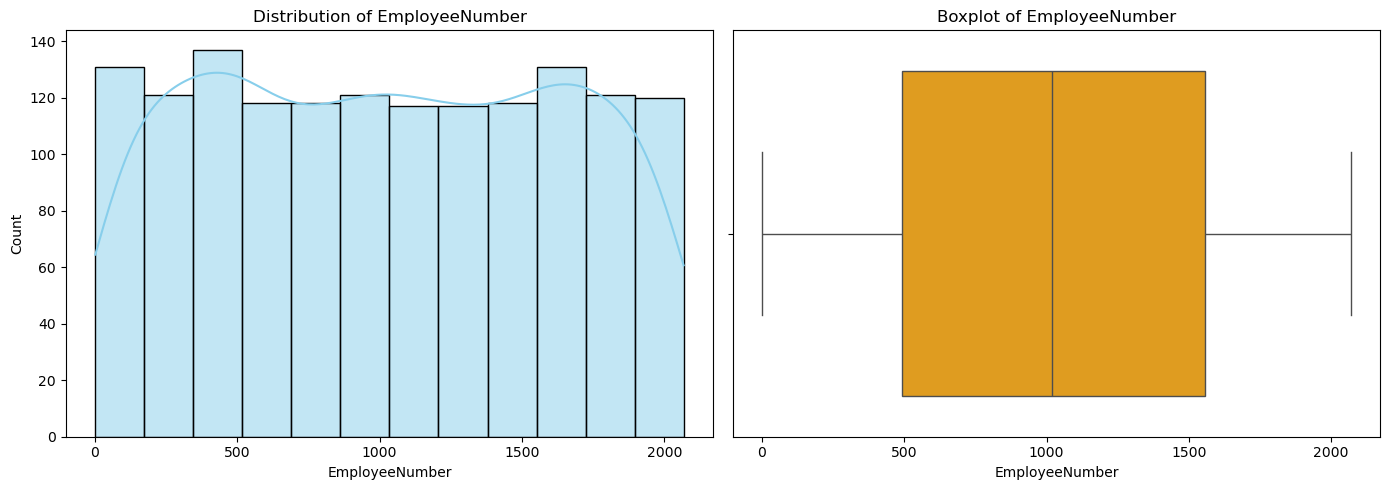

--------------------------------------------------
Analysis of EnvironmentSatisfaction: 

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

 Missing values are: 0




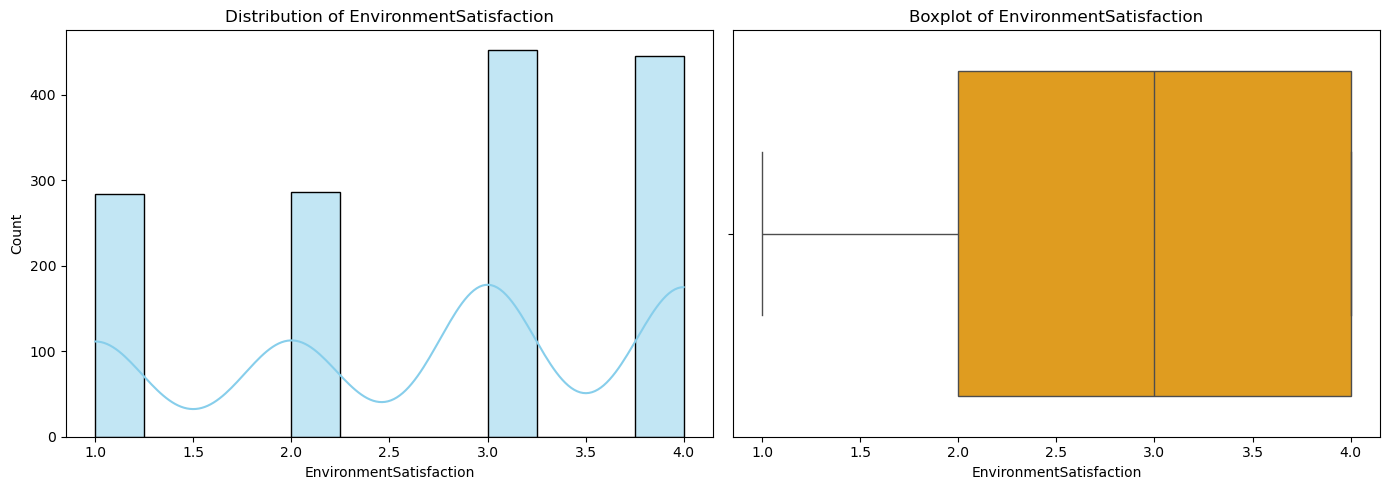

--------------------------------------------------
Analysis of HourlyRate: 

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

 Missing values are: 0




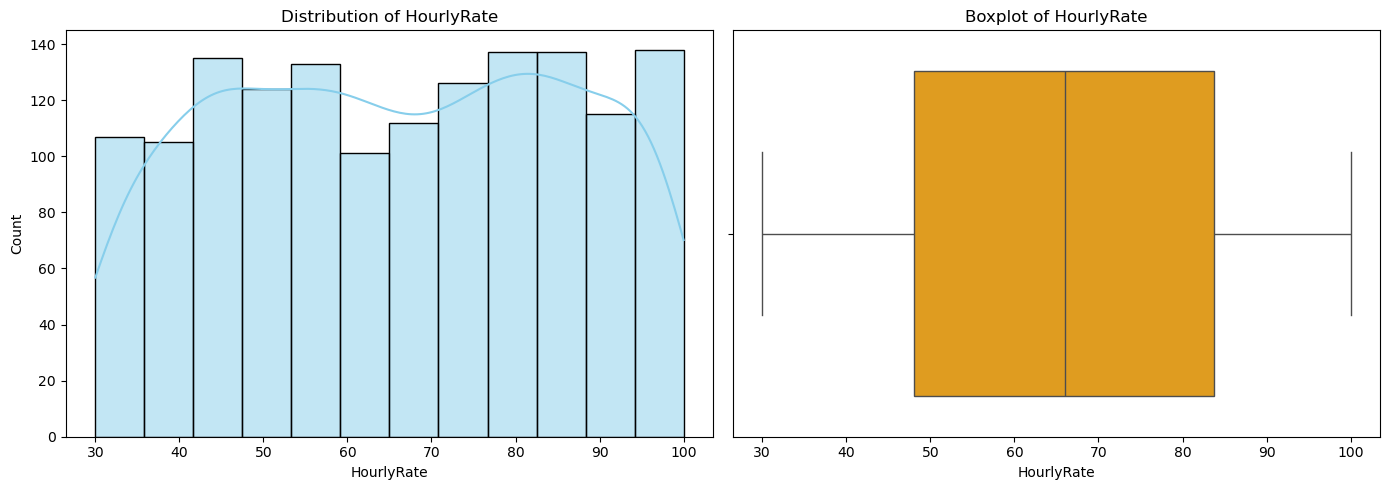

--------------------------------------------------
Analysis of JobInvolvement: 

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

 Missing values are: 0




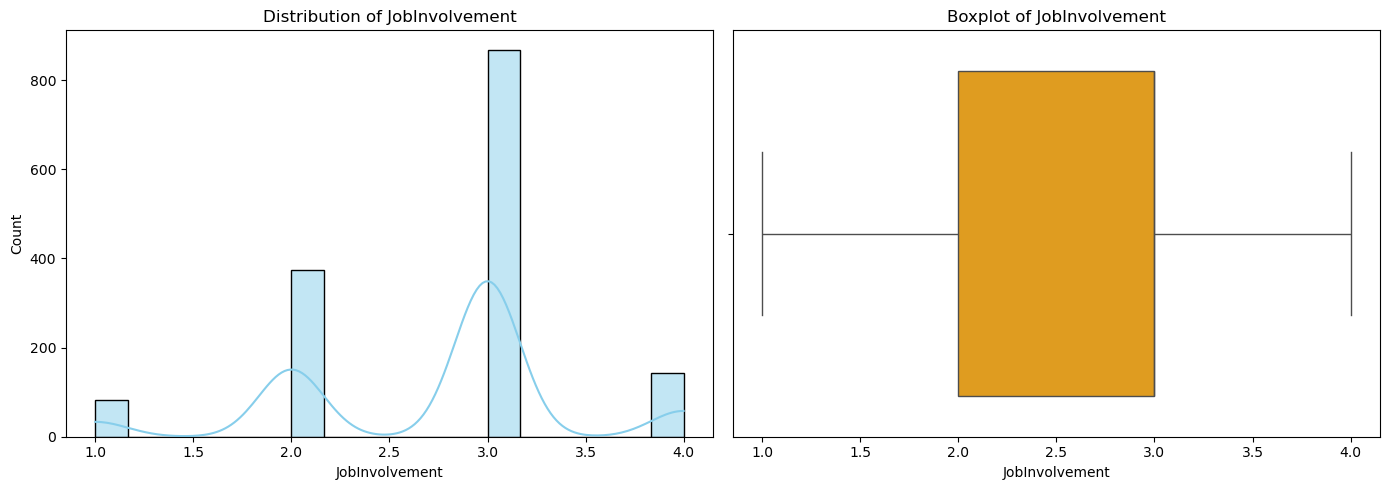

--------------------------------------------------
Analysis of JobLevel: 

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

 Missing values are: 0




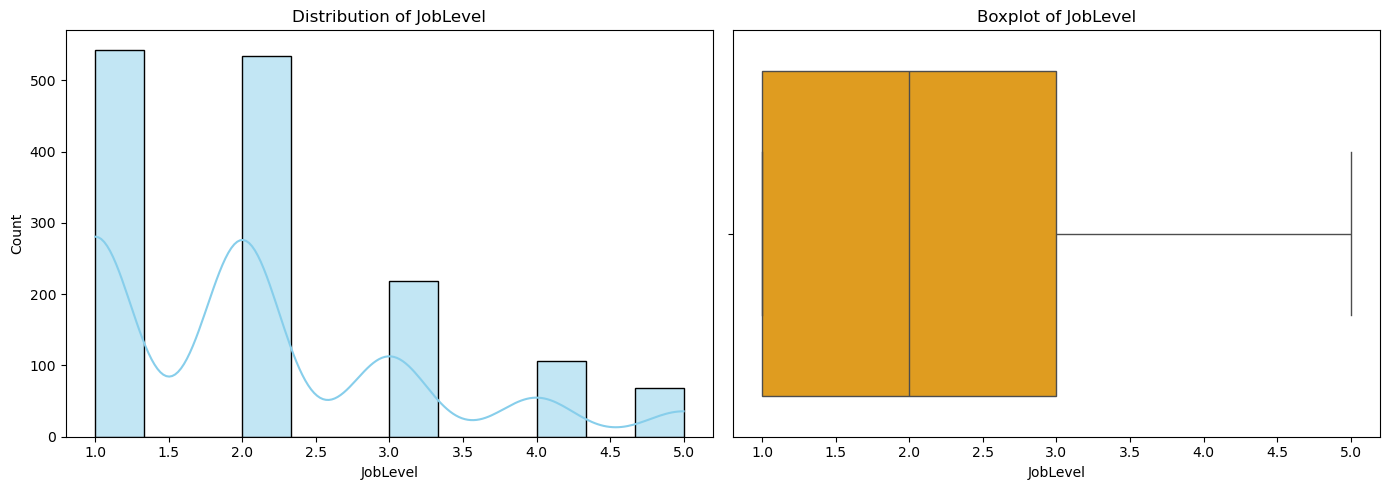

--------------------------------------------------
Analysis of JobSatisfaction: 

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

 Missing values are: 0




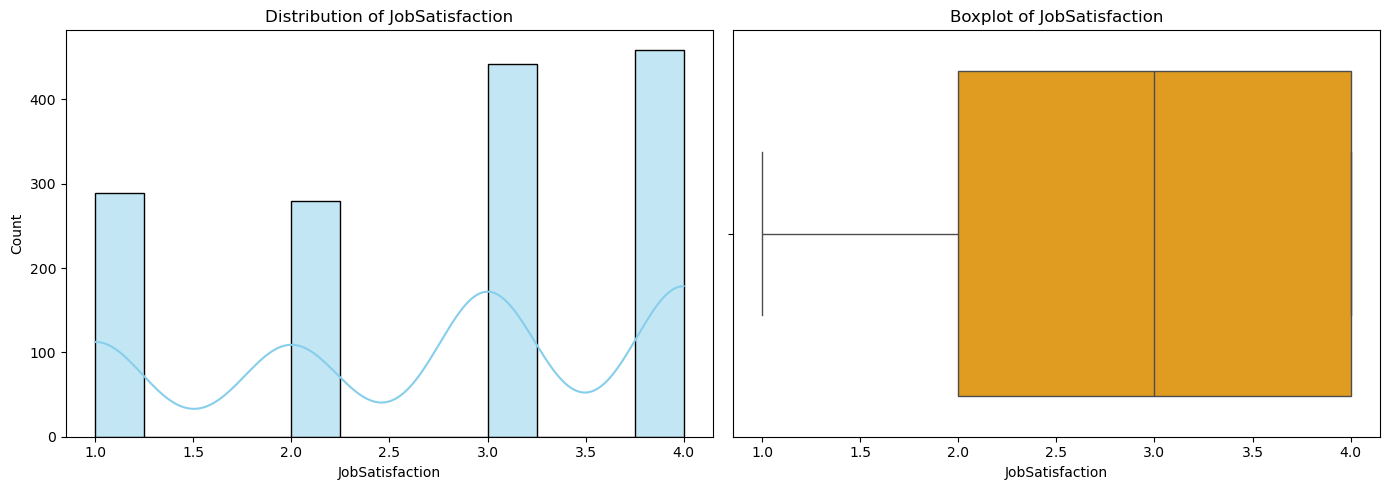

--------------------------------------------------
Analysis of MonthlyIncome: 

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

 Missing values are: 0




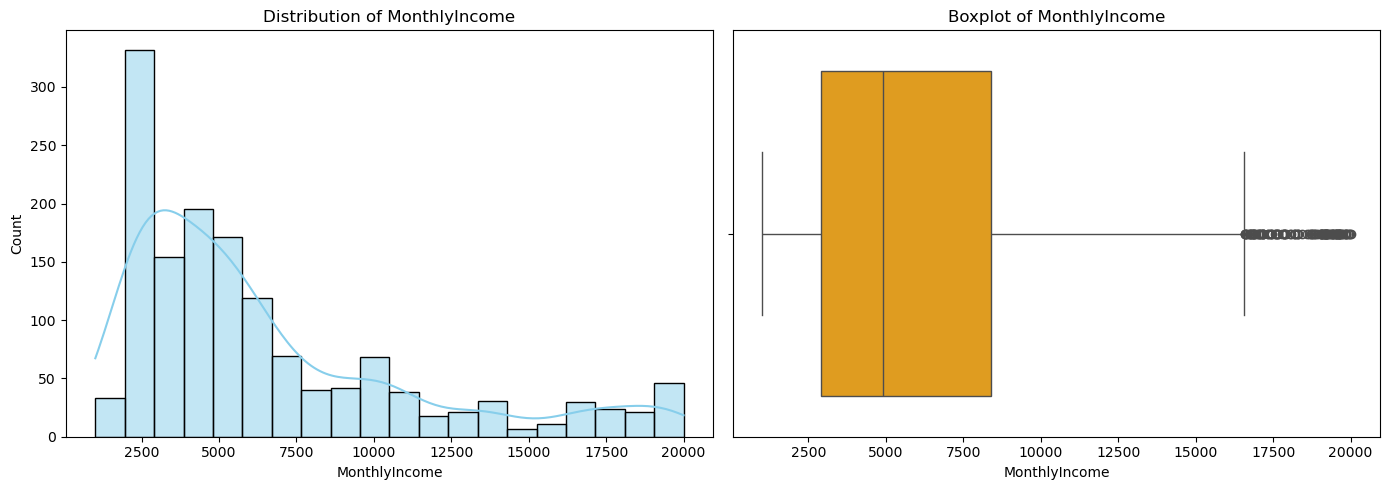

--------------------------------------------------
Analysis of MonthlyRate: 

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

 Missing values are: 0




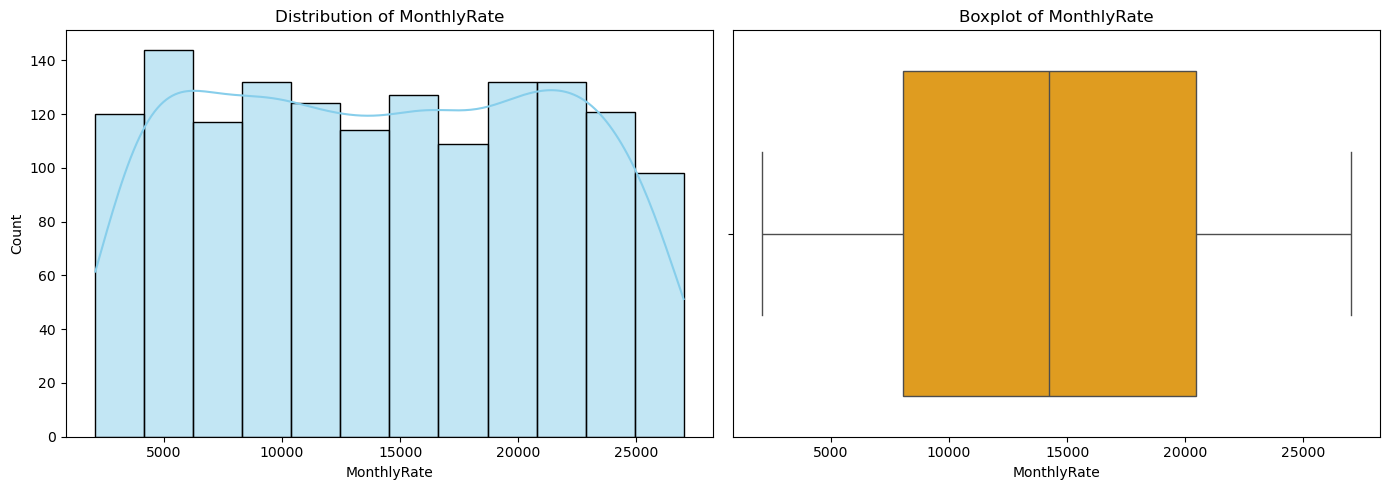

--------------------------------------------------
Analysis of NumCompaniesWorked: 

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

 Missing values are: 0




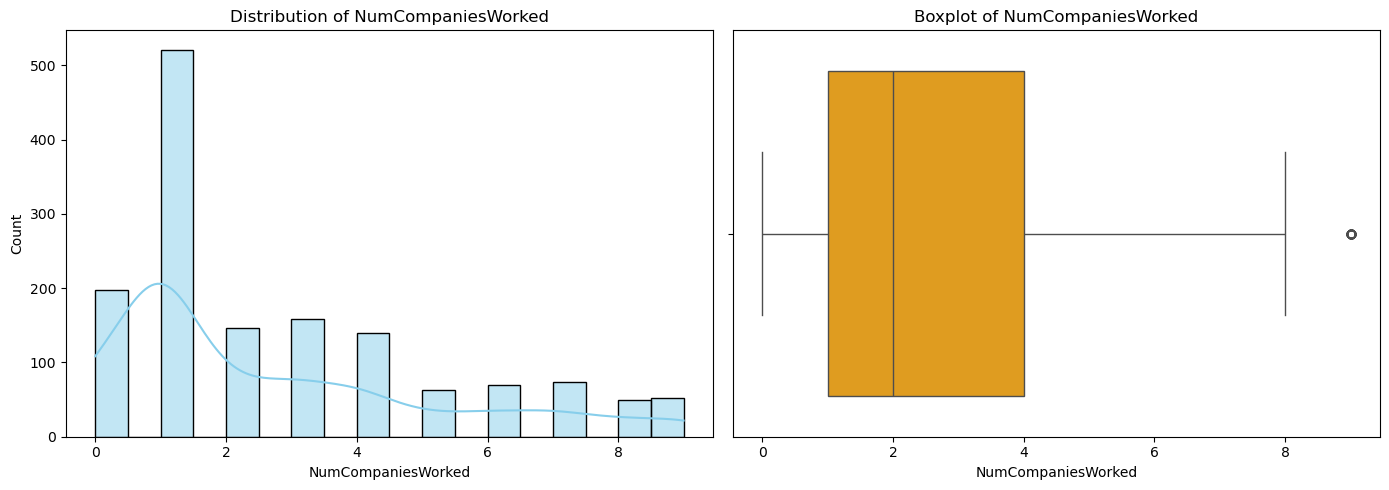

--------------------------------------------------
Analysis of PercentSalaryHike: 

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

 Missing values are: 0




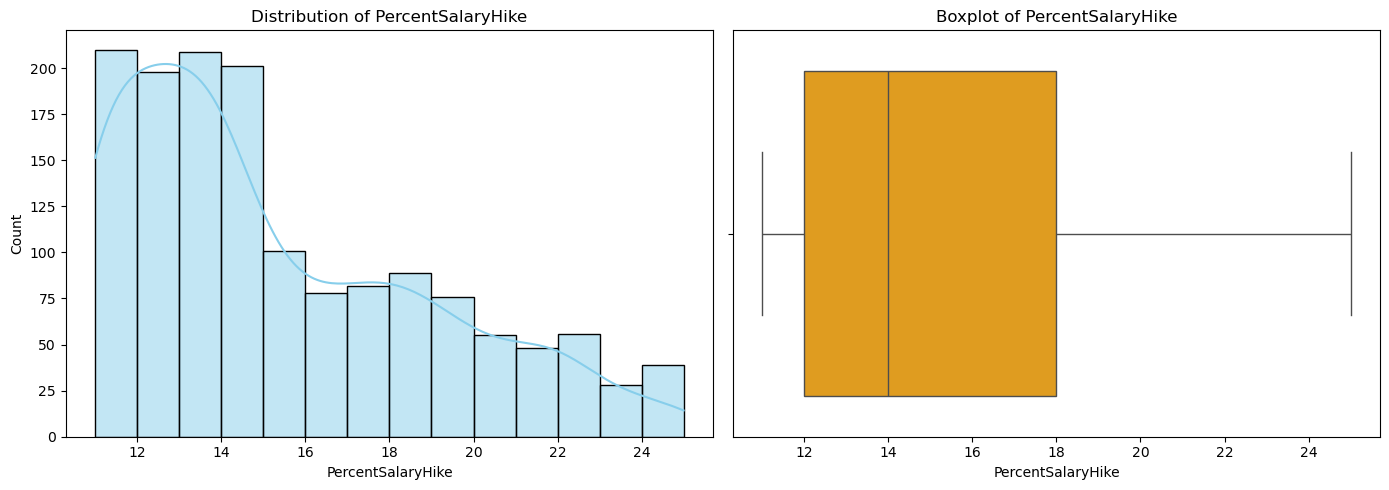

--------------------------------------------------
Analysis of PerformanceRating: 

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

 Missing values are: 0




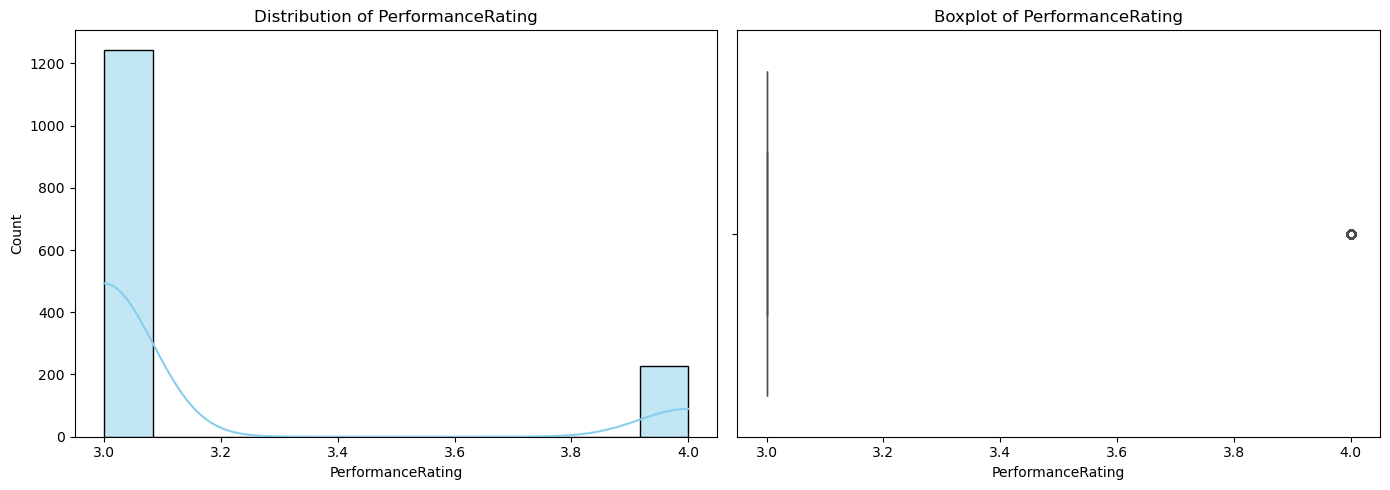

--------------------------------------------------
Analysis of RelationshipSatisfaction: 

count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

 Missing values are: 0




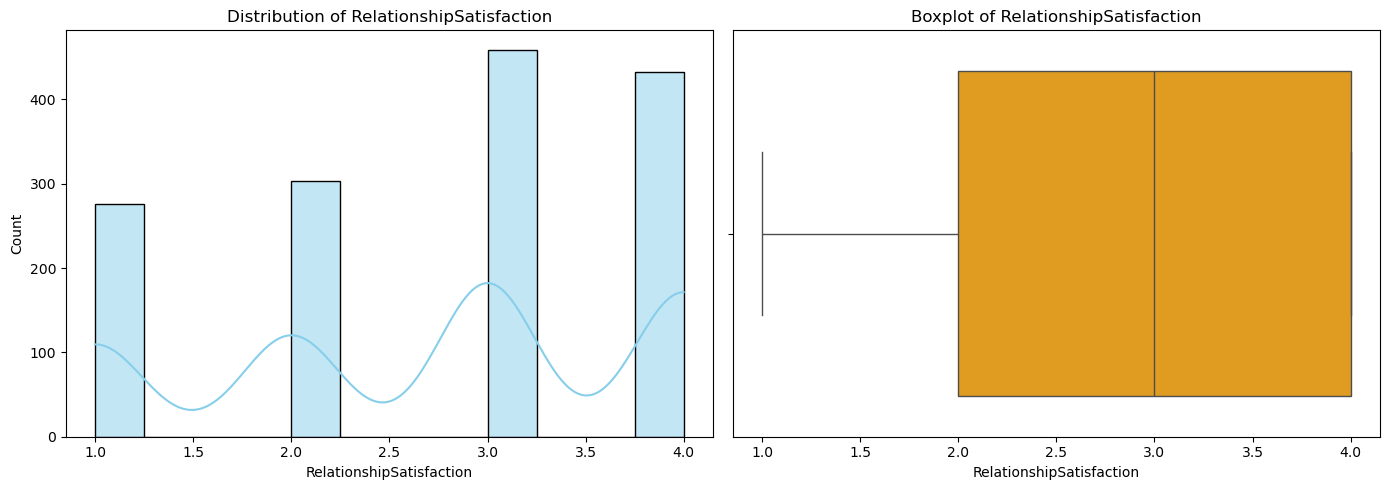

--------------------------------------------------
Analysis of StockOptionLevel: 

count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

 Missing values are: 0




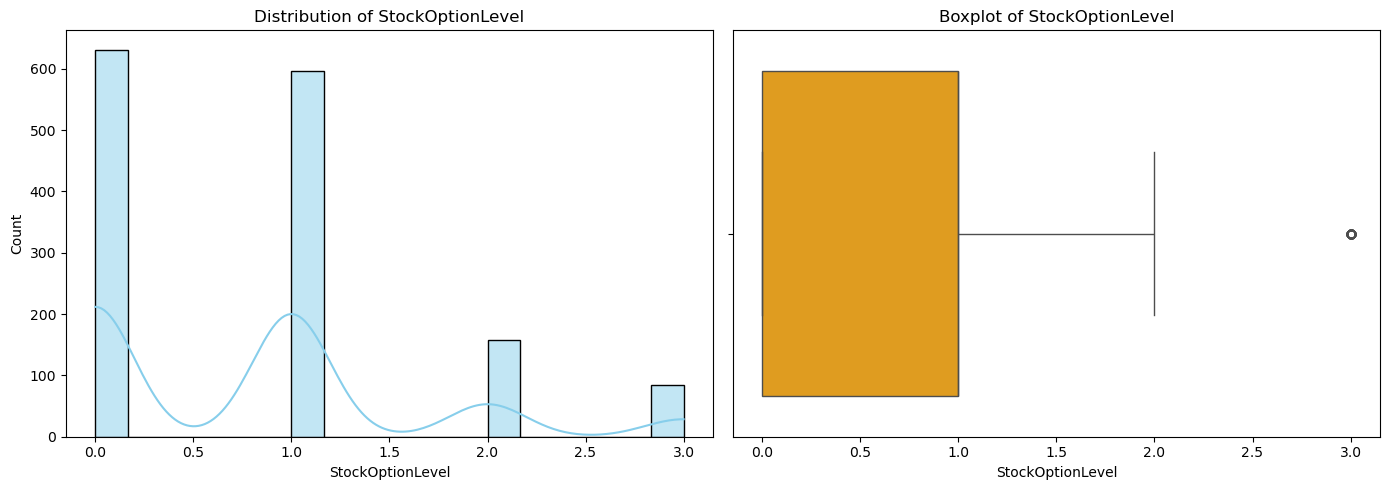

--------------------------------------------------
Analysis of TotalWorkingYears: 

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

 Missing values are: 0




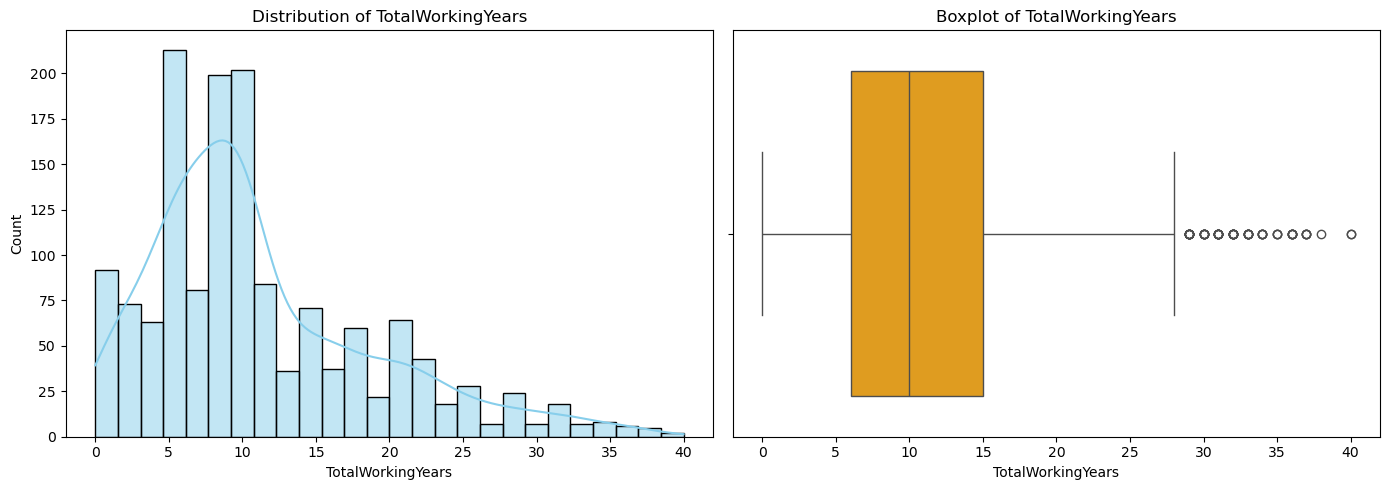

--------------------------------------------------
Analysis of TrainingTimesLastYear: 

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

 Missing values are: 0




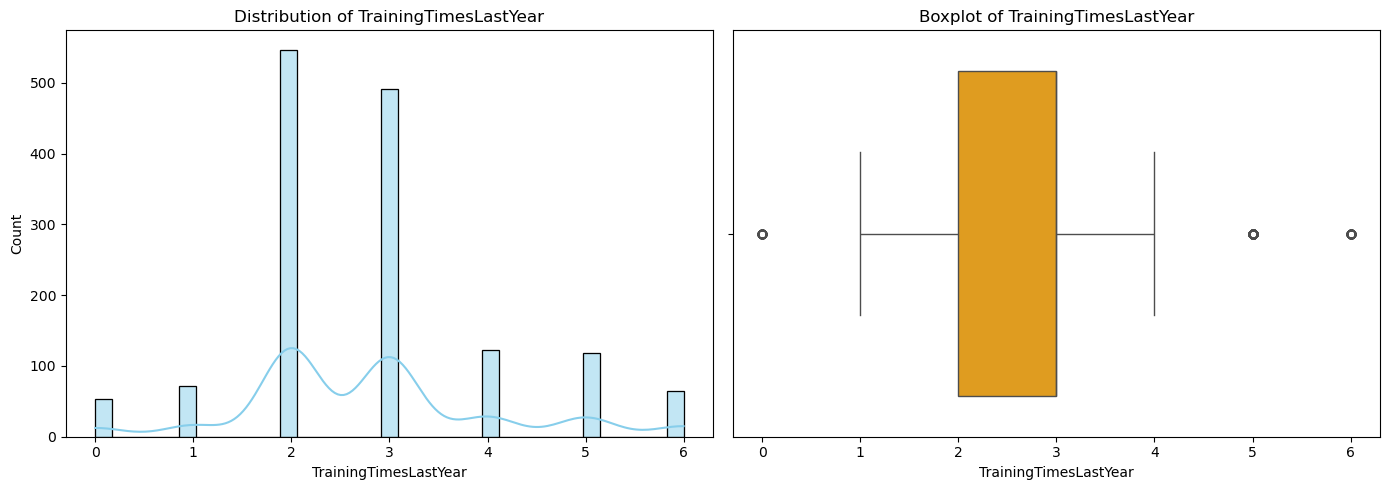

--------------------------------------------------
Analysis of WorkLifeBalance: 

count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

 Missing values are: 0




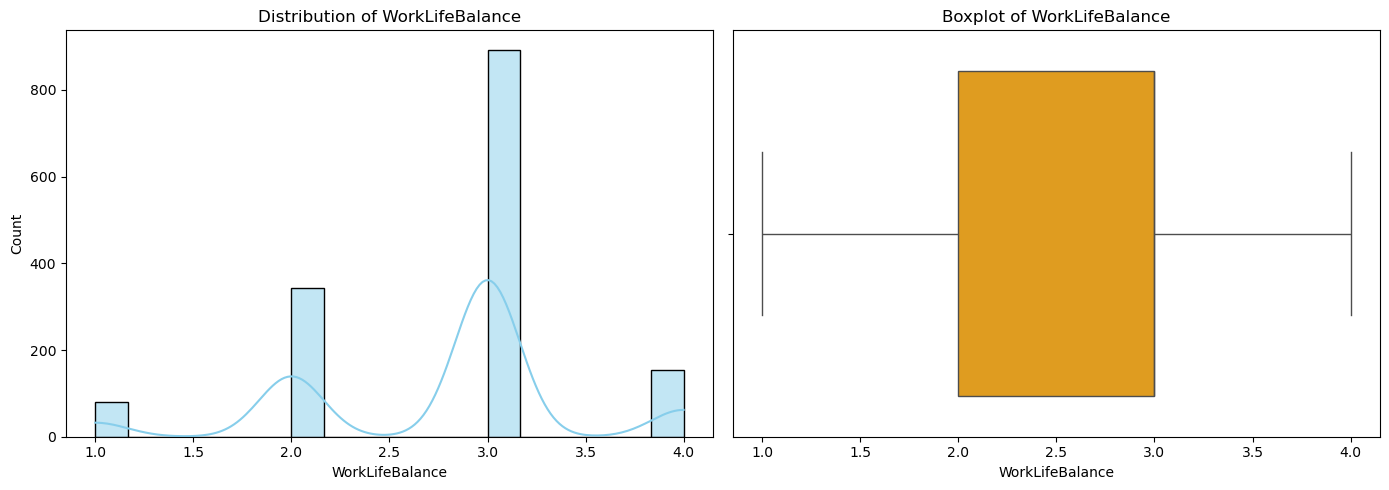

--------------------------------------------------
Analysis of YearsAtCompany: 

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

 Missing values are: 0




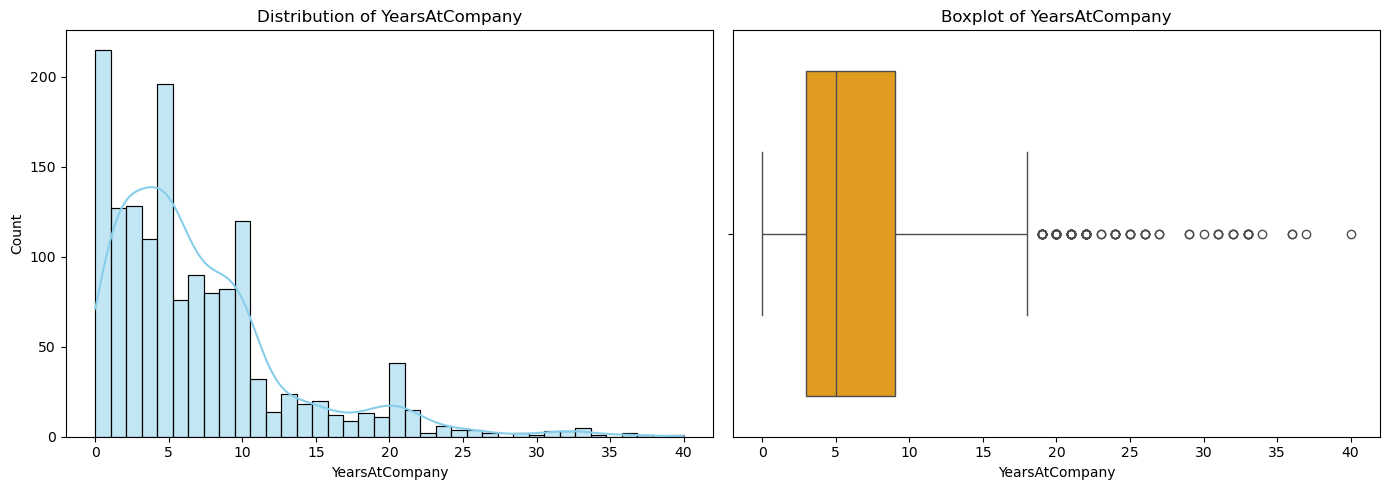

--------------------------------------------------
Analysis of YearsInCurrentRole: 

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

 Missing values are: 0




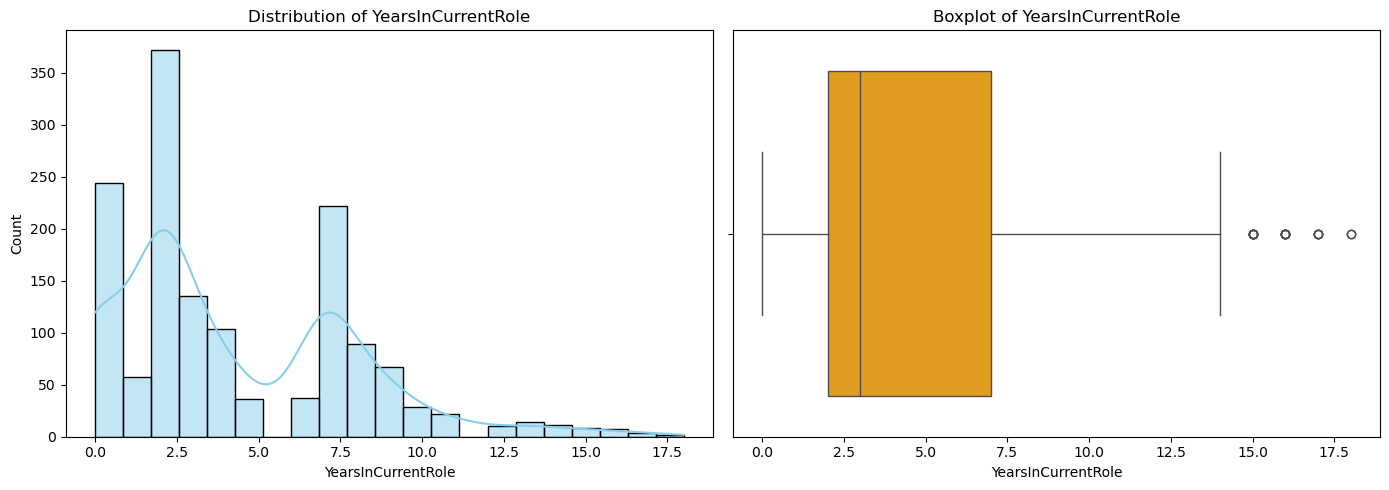

--------------------------------------------------
Analysis of YearsSinceLastPromotion: 

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

 Missing values are: 0




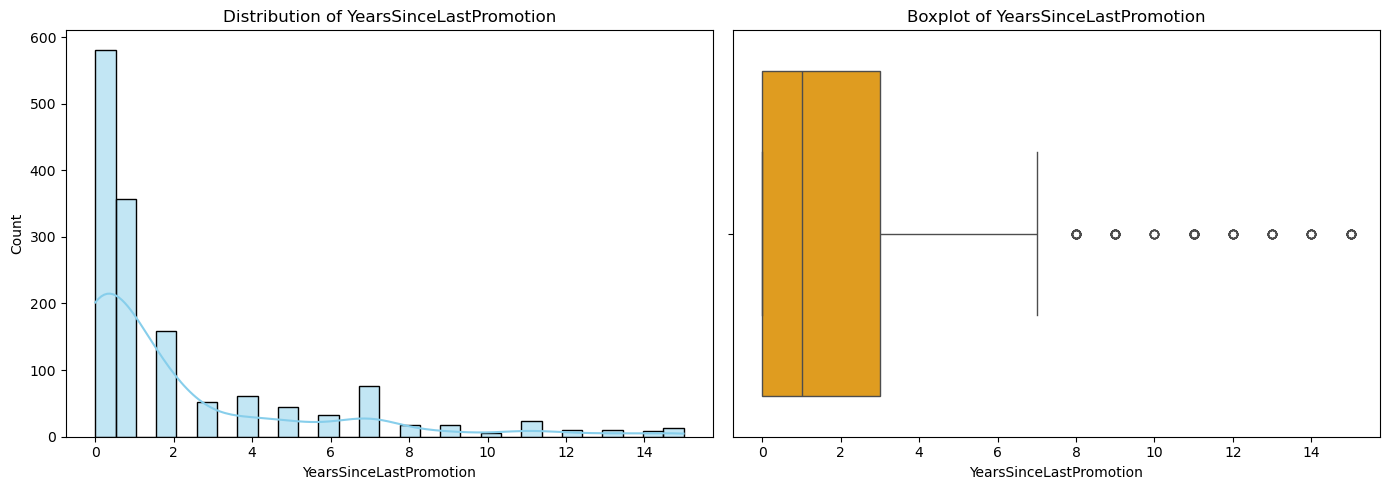

--------------------------------------------------
Analysis of YearsWithCurrManager: 

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

 Missing values are: 0




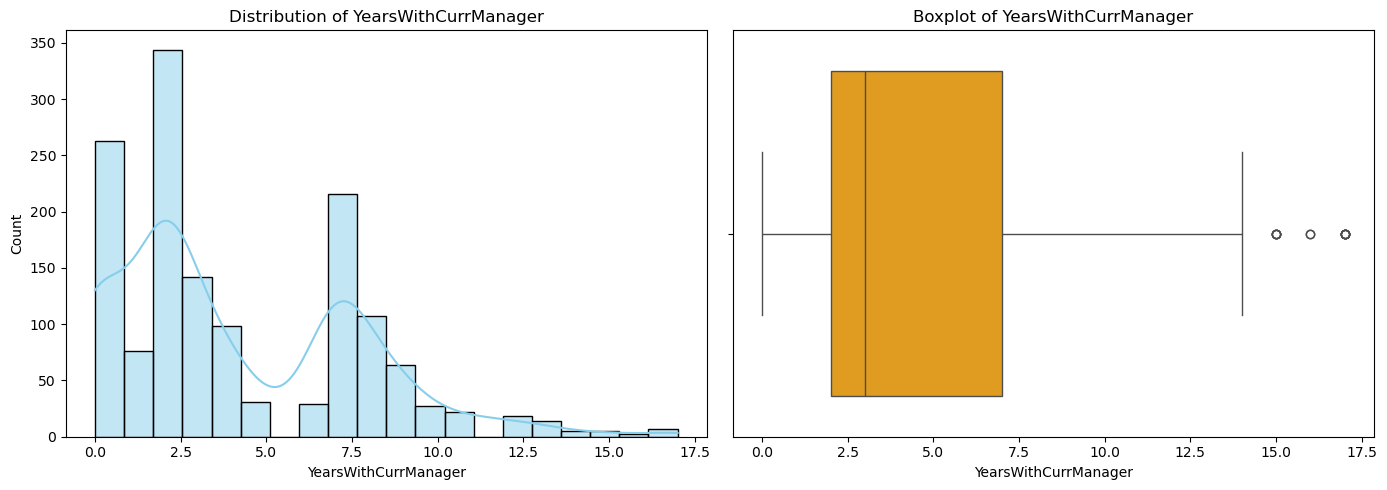

--------------------------------------------------


In [22]:
for col in numerical:
    print(f'Analysis of {col}: \n')
    
    # Using describe() gives count, mean, std, min, 25%, 50%, 75%, max
    print(df[col].describe())
    missing_val_count=df[col].isna().sum()
    print(f'\n Missing values are: {missing_val_count}')
    print('\n')

    # We create a figure with 2 subplots: one for distribution, one for outliers
    fig,axes=plt.subplots(1,2,figsize=(14,5)) 
    
    # Plot 1: Histogram with KDE (Kernel Density Estimate)
    sns.histplot(data=df,x=col,kde=True,ax=axes[0],color='skyblue')
    axes[0].set_title('Distribution of {}'.format(col))
    
    # Plot 2: Boxplot (for outlier detection)
    sns.boxplot(data=df,x=col,ax=axes[1],color='orange')
    axes[1].set_title(f'Boxplot of {col}')

    # Show the plots
    plt.tight_layout()
    plt.show()

    print('-'*50)

The following features are right skewed: DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,
TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion.So,I am applying log transformation 
technique to handle the skewness

#### Outlier treatment

In [25]:
# applying the log transformation technique
columns_for_log_transformation=['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel',
                                'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                                'YearsWithCurrManager']

for col in columns_for_log_transformation:
    df[col]=np.log1p(df[col])

df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0          0.693147          2  Life Sciences               1   
1          2.197225          1  Life Sciences               2   
2          1.098612          2          Other               4   
3          1.386294          4  Life Sciences               5   
4          1.098612          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0          0.000000           2.197225              0.000000                1   
1          0.693147           2.397895              1.386294                3   
2          0.000000           2.079442              1.386294                3   
3          0.000000           2.197225              1.386294                3   
4          0.693147           1.945910              1.386294                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0       1.945910            1.609438                 0.000000   
1       2.397895            2.079442                 0.693147   
2       0.000000            0.000000                 0.000000   
3       2.197225            2.079442                 1.386294   
4       1.098612            1.098612                 1.098612   

   YearsWithCurrManager  
0              1.791759  
1              2.079442  
2              0.000000  
3              0.000000  
4              1.098612  

[5 rows x 32 columns]

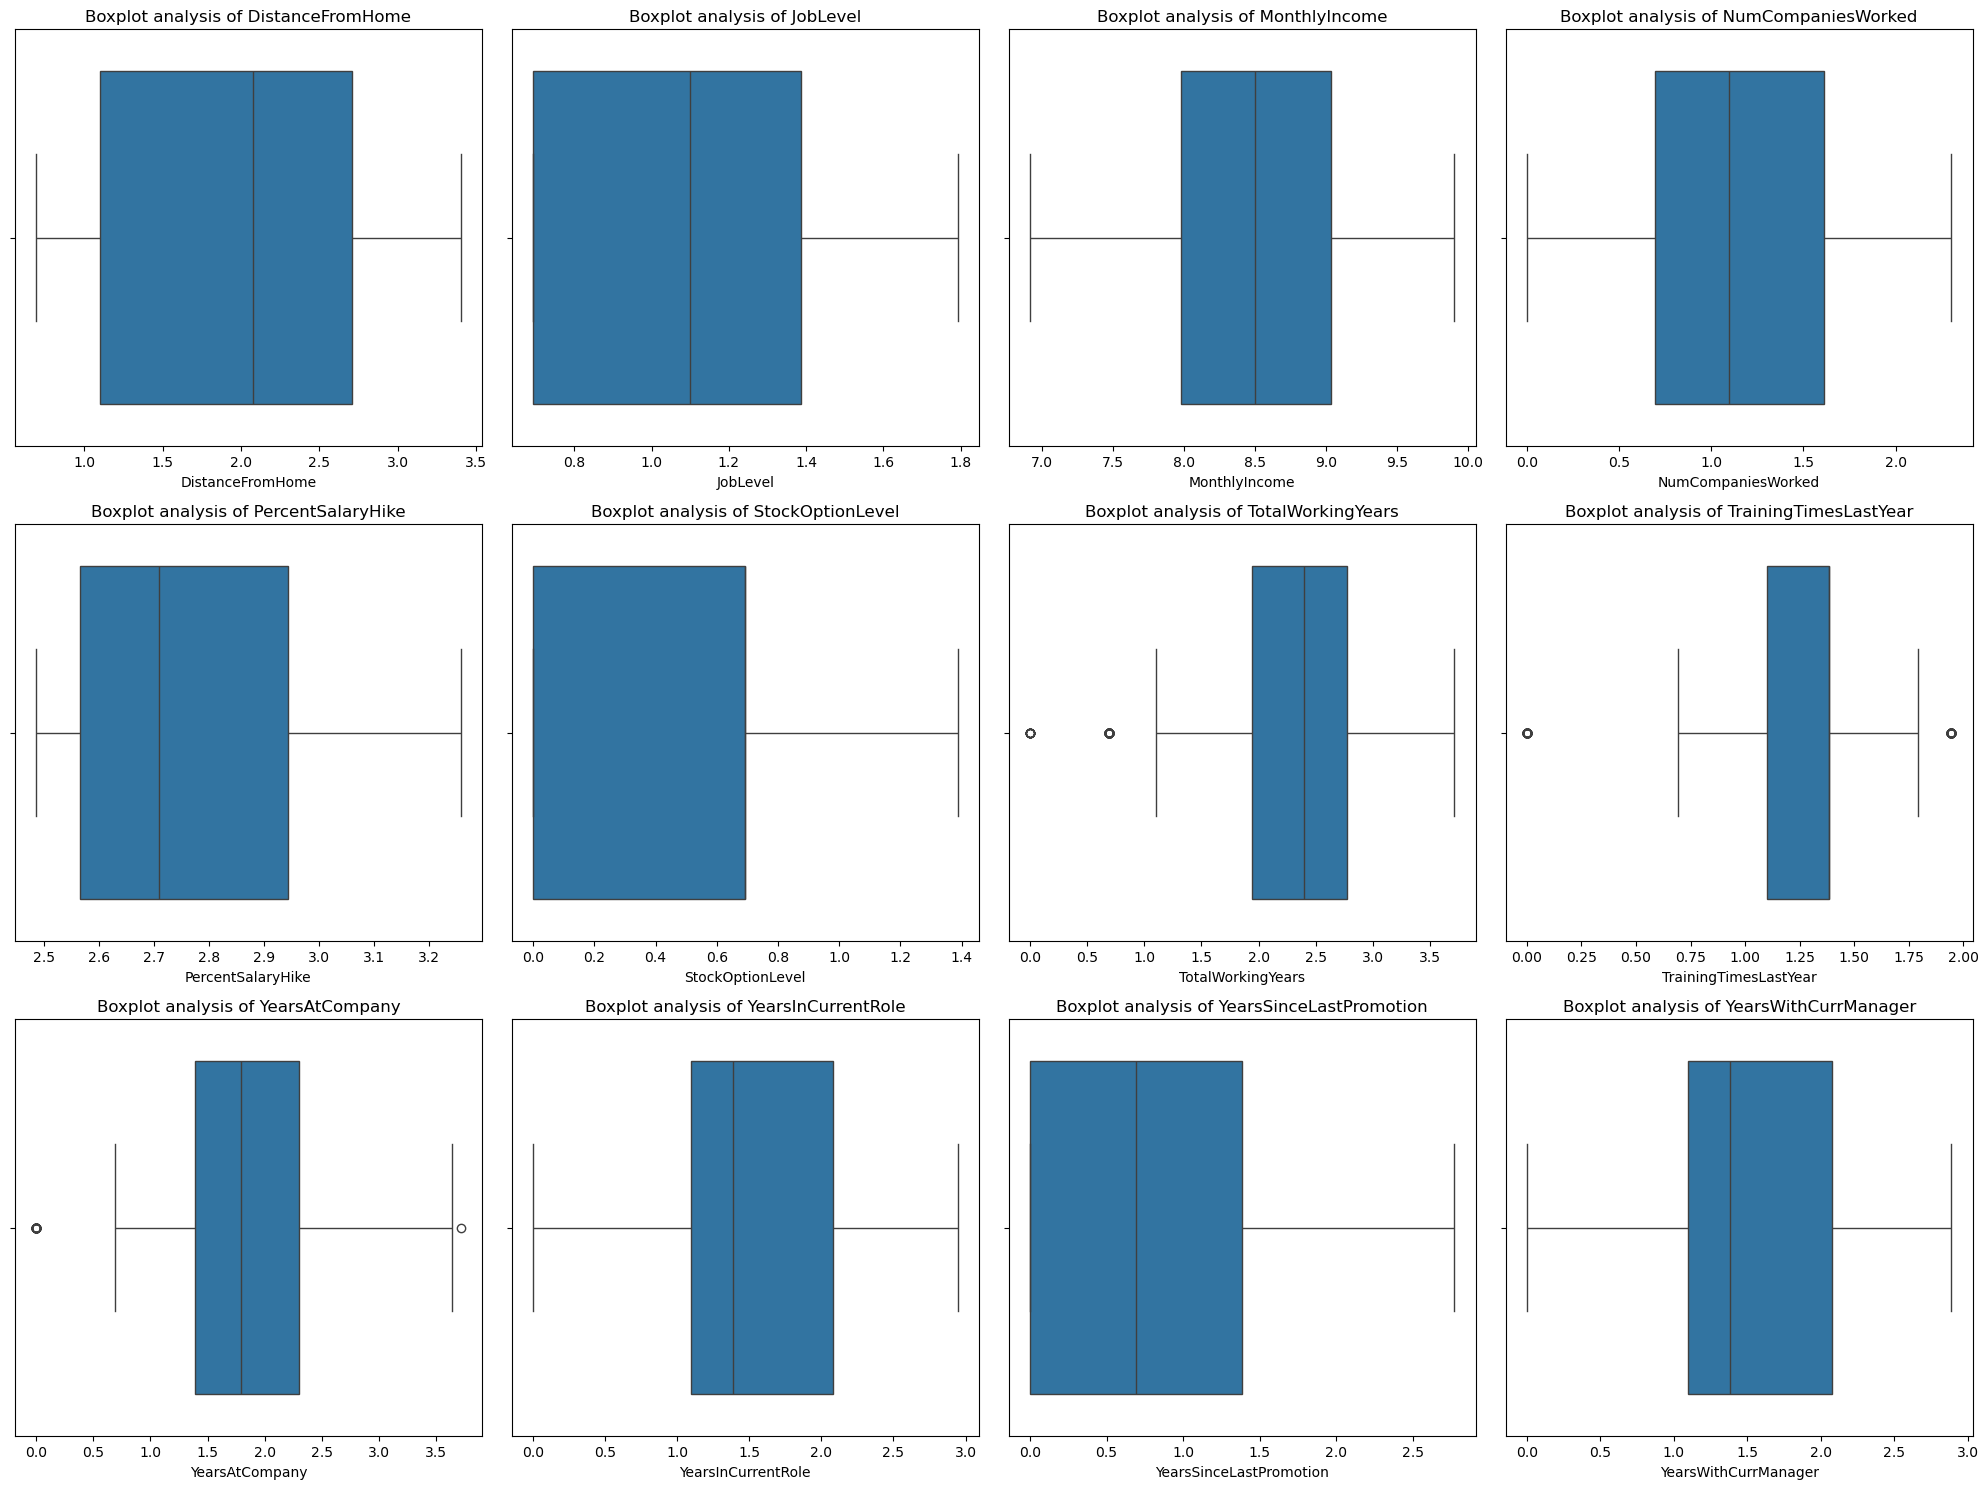

In [26]:
# visualizing the log transformed features using box plots
figure,axes=plt.subplots(3,4,figsize=(20,15))
axes=axes.flatten()

for i, col in enumerate(columns_for_log_transformation):
    sns.boxplot(data=df,x=col,ax=axes[i])
    axes[i].set_title('Boxplot analysis of {}'.format(col))

plt.tight_layout()
plt.show()

In [27]:
print('List of categorical features is: \n \n {}'.format(categorical))

List of categorical features is: 
 
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [28]:
print('Length(number) of categorical features is: {}'.format(len(categorical)))

Length(number) of categorical features is: 8


#### Categorical features

Analysis of 0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object column
Missing values : 0

 Distribution table:
           Count  Percentage
Attrition                   
No          1233       83.88
Yes          237       16.12


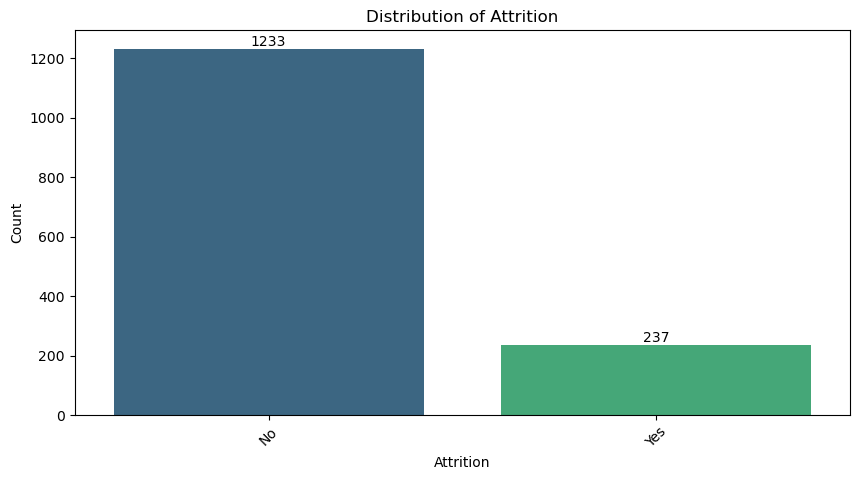

Analysis of 0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object column
Missing values : 0

 Distribution table:
                   Count  Percentage
BusinessTravel                      
Travel_Rarely       1043       70.95
Travel_Frequently    277       18.84
Non-Travel           150       10.20


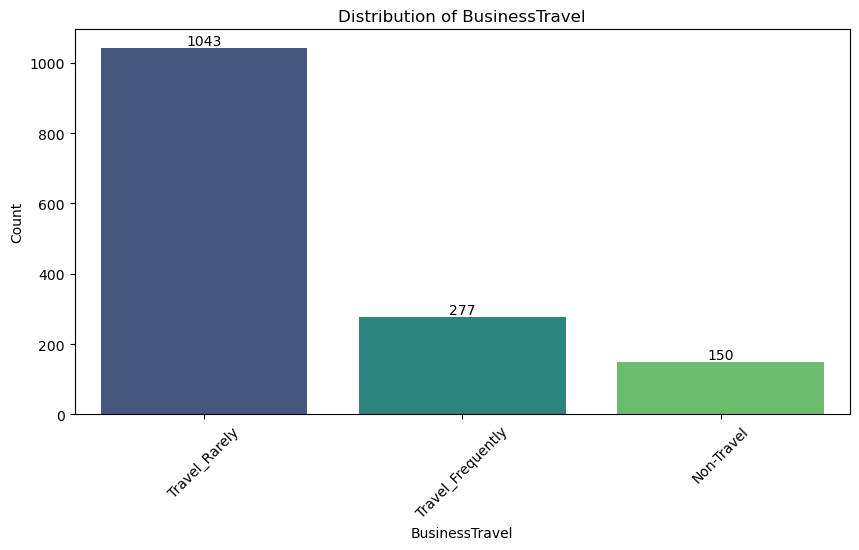

Analysis of 0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object column
Missing values : 0

 Distribution table:
                        Count  Percentage
Department                               
Research & Development    961       65.37
Sales                     446       30.34
Human Resources            63        4.29


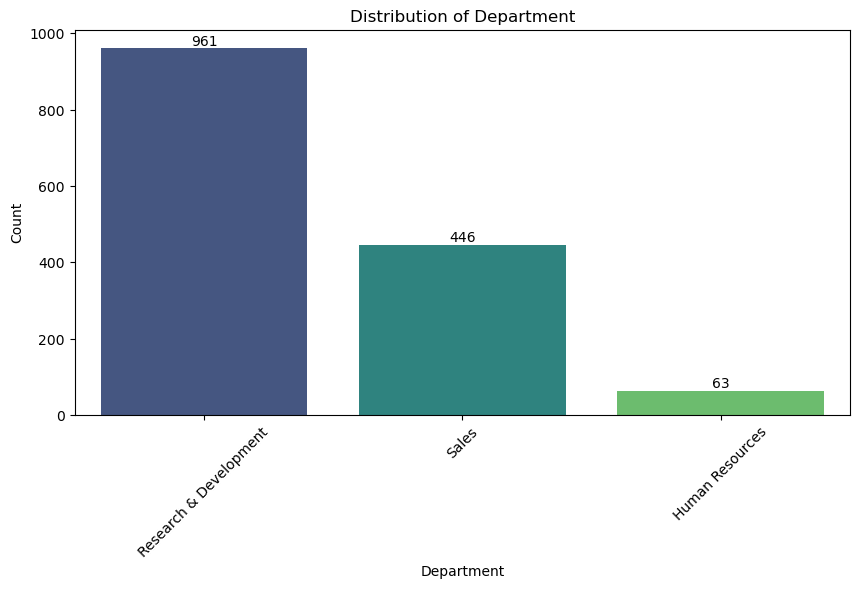

Analysis of 0       Life Sciences
1       Life Sciences
2               Other
3       Life Sciences
4             Medical
            ...      
1465          Medical
1466          Medical
1467    Life Sciences
1468          Medical
1469          Medical
Name: EducationField, Length: 1470, dtype: object column
Missing values : 0

 Distribution table:
                  Count  Percentage
EducationField                     
Life Sciences       606       41.22
Medical             464       31.56
Marketing           159       10.82
Technical Degree    132        8.98
Other                82        5.58
Human Resources      27        1.84


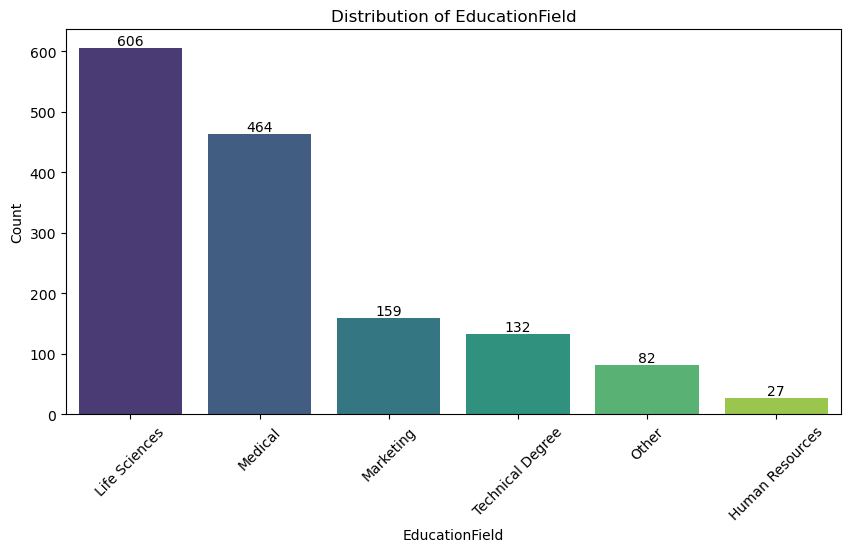

Analysis of 0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object column
Missing values : 0

 Distribution table:
        Count  Percentage
Gender                   
Male      882        60.0
Female    588        40.0


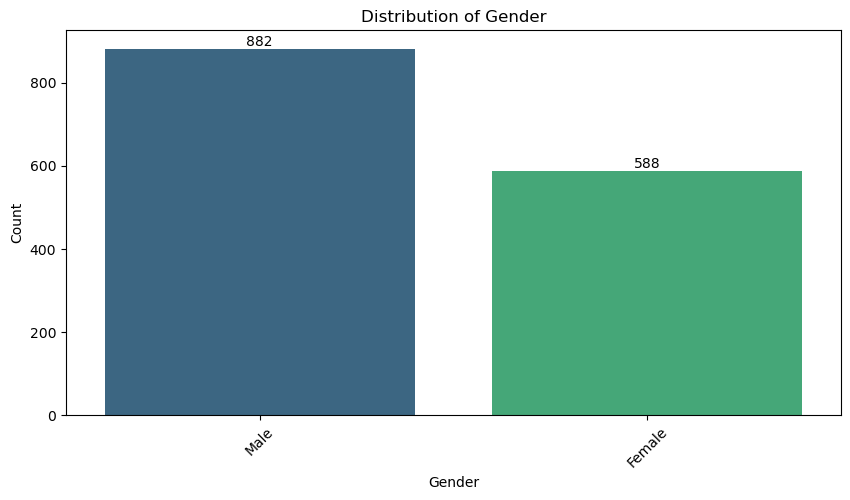

Analysis of 0                 Sales Executive
1              Research Scientist
2           Laboratory Technician
3              Research Scientist
4           Laboratory Technician
                  ...            
1465        Laboratory Technician
1466    Healthcare Representative
1467       Manufacturing Director
1468              Sales Executive
1469        Laboratory Technician
Name: JobRole, Length: 1470, dtype: object column
Missing values : 0

 Distribution table:
                           Count  Percentage
JobRole                                     
Sales Executive              326       22.18
Research Scientist           292       19.86
Laboratory Technician        259       17.62
Manufacturing Director       145        9.86
Healthcare Representative    131        8.91
Manager                      102        6.94
Sales Representative          83        5.65
Research Director             80        5.44
Human Resources               52        3.54


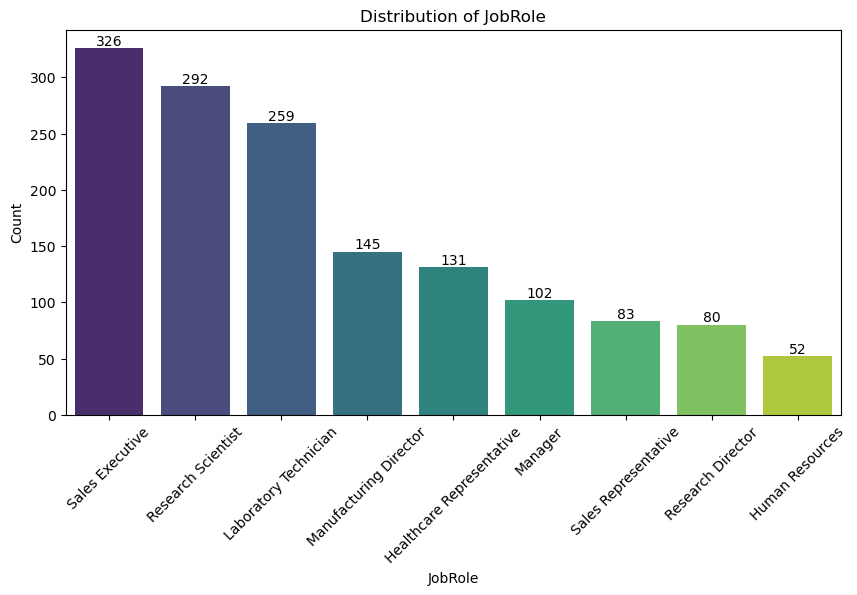

Analysis of 0        Single
1       Married
2        Single
3       Married
4       Married
         ...   
1465    Married
1466    Married
1467    Married
1468    Married
1469    Married
Name: MaritalStatus, Length: 1470, dtype: object column
Missing values : 0

 Distribution table:
               Count  Percentage
MaritalStatus                   
Married          673       45.78
Single           470       31.97
Divorced         327       22.24


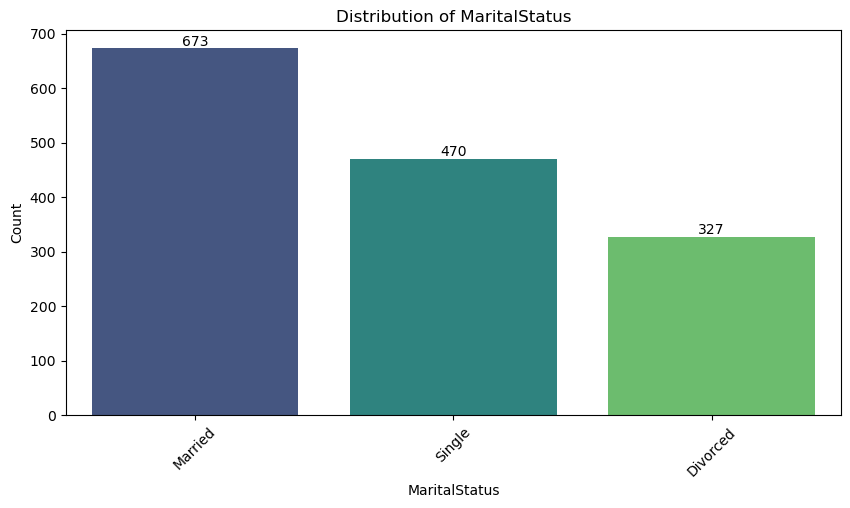

Analysis of 0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object column
Missing values : 0

 Distribution table:
          Count  Percentage
OverTime                   
No         1054        71.7
Yes         416        28.3


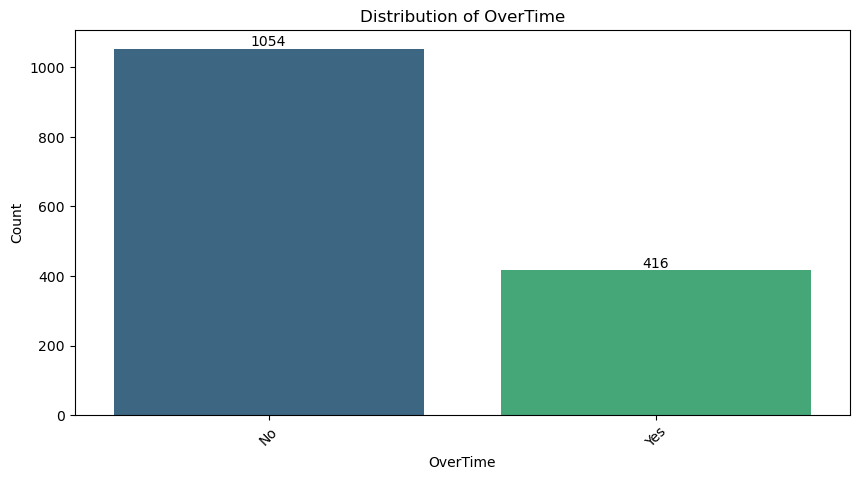

In [30]:
for column in categorical:
    
    # Check for Missing Values
    missing_count=df[column].isnull().sum()
    print('Analysis of {} column'.format(df[column]))
    print(f'Missing values : {missing_count}')


    # Frequency Distribution (Counts and Percentages)
    # value_counts(normalize=True) gives proportions
    count=df[column].value_counts()
    percentage=df[column].value_counts(normalize=True)*100

    # Combine into a clear dataframe for display
    stats_df=pd.DataFrame({
        'Count':count,
        'Percentage':percentage.round(2)
    })

    print('\n Distribution table:')
    print(stats_df)

    plot_data=count

    # Visualization
    plt.figure(figsize=(10,5))

    # Bar Chart (Best for comparing magnitudes)
    # Using seaborn for aesthetics
    sns.barplot(x=plot_data.index,y=plot_data.values,hue=plot_data.index,palette='viridis',legend=False)

    plt.title(f'Distribution of {column}')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=45) # Rotate labels if they are long

    # Add text labels on bars
    for i,v in enumerate(plot_data.values):
        plt.text(i,v,str(v),ha='center',va='bottom')

    plt.show()

## Bivariate Analysis

#### Categorical features vs target

Analysing BusinessTravel vs Attrition

 Contingency table:
Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156


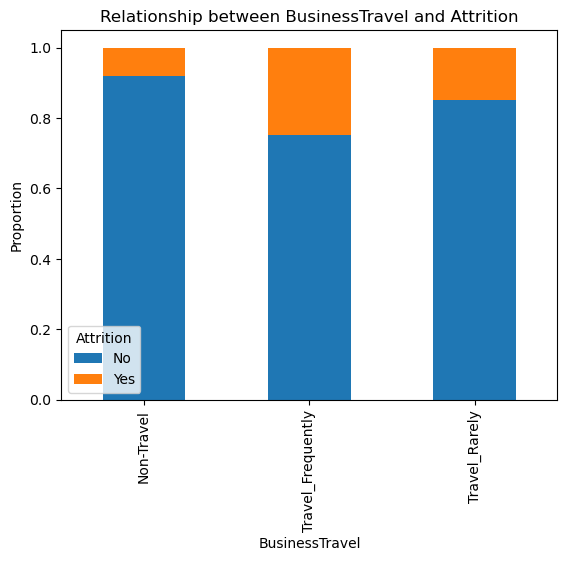

Analysing Department vs Attrition

 Contingency table:
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


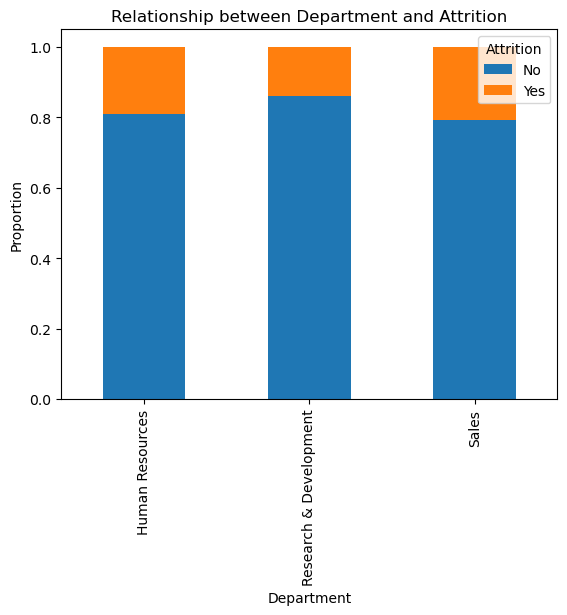

Analysing EducationField vs Attrition

 Contingency table:
Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32


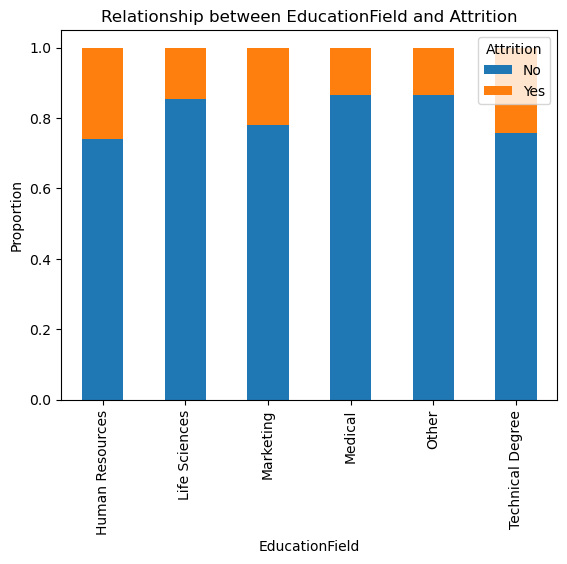

Analysing Gender vs Attrition

 Contingency table:
Attrition   No  Yes
Gender             
Female     501   87
Male       732  150


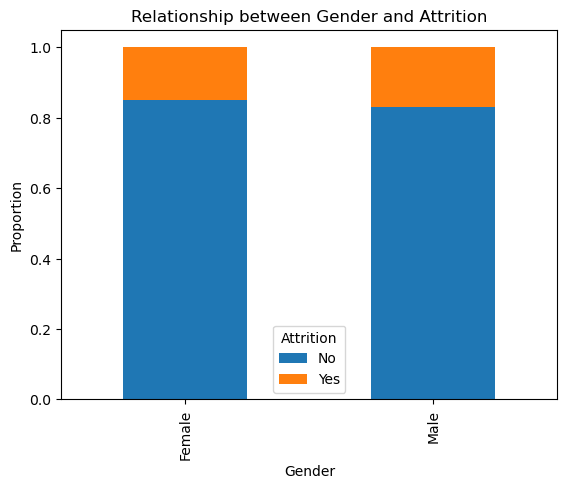

Analysing JobRole vs Attrition

 Contingency table:
Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33


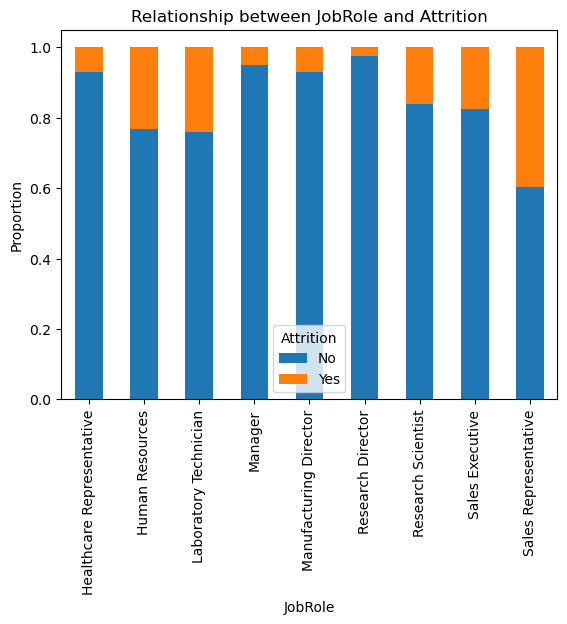

Analysing MaritalStatus vs Attrition

 Contingency table:
Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120


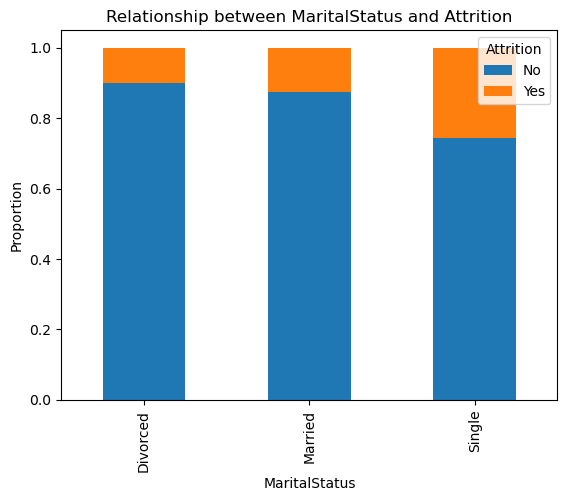

Analysing OverTime vs Attrition

 Contingency table:
Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


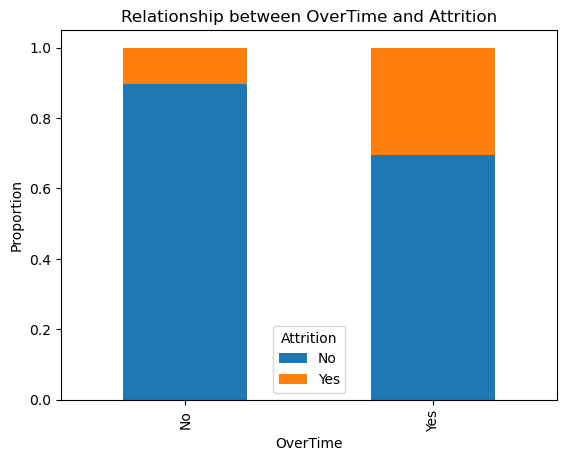

In [33]:
for feature in categorical:
    if feature!='Attrition':
        print(f'Analysing {feature} vs {'Attrition'}')
    
        # Contingency Table (Cross-tabulation)
        contingency_table=pd.crosstab(df[feature],df['Attrition'])
        print('\n Contingency table:')
        print(contingency_table)
    
        # Visual: Stacked Bar Plot (Proportions often clearer than raw counts)
        # Normalize by index (row) to see percentage of target per feature category
        contingency_norm=pd.crosstab(df[feature],df['Attrition'],normalize='index')
        contingency_norm.plot(kind='bar',stacked=True)
        plt.title(f'Relationship between {feature} and {'Attrition'}')
        plt.ylabel('Proportion')
        plt.show()

#### Numerical features vs target

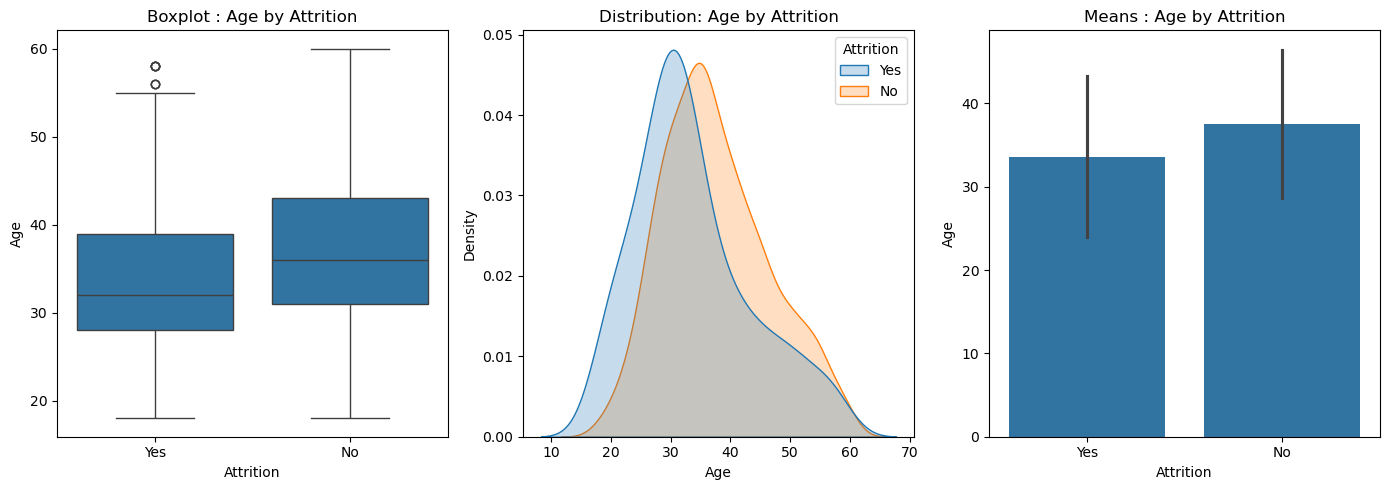

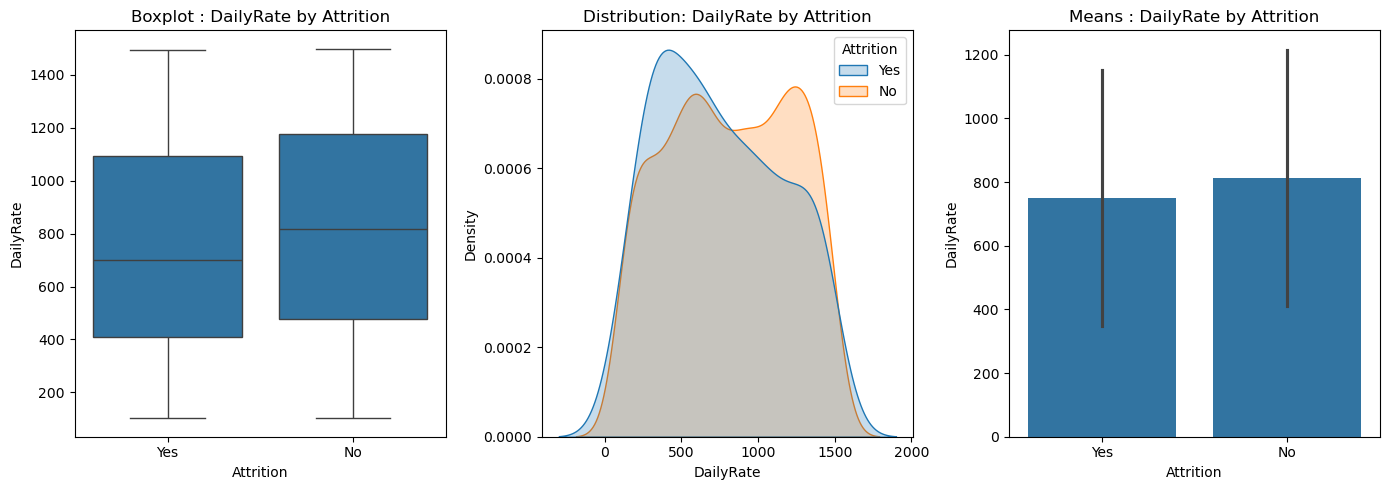

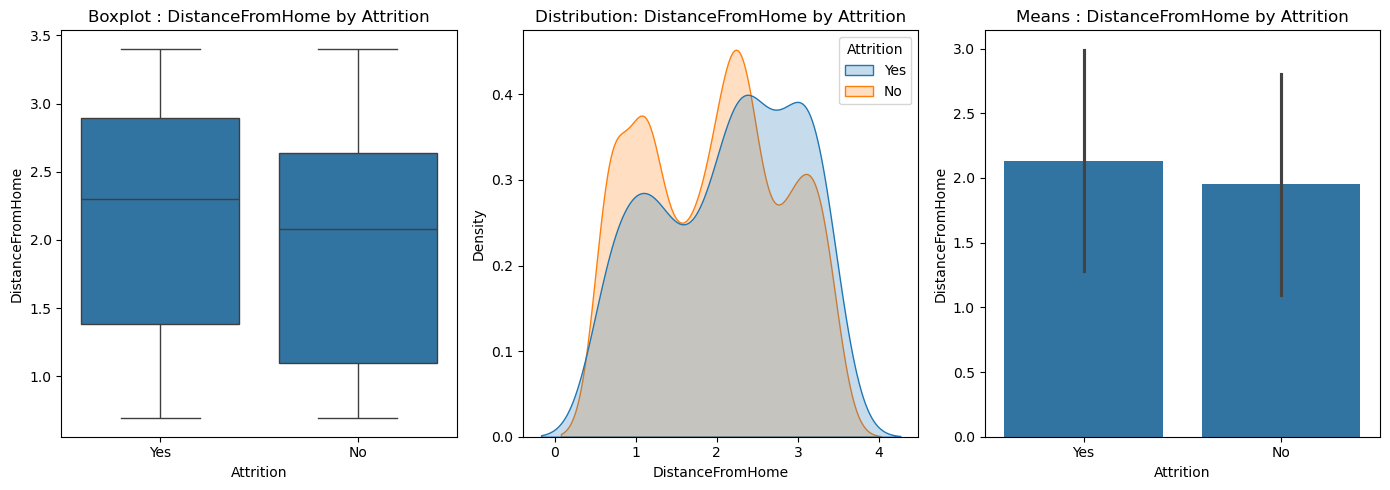

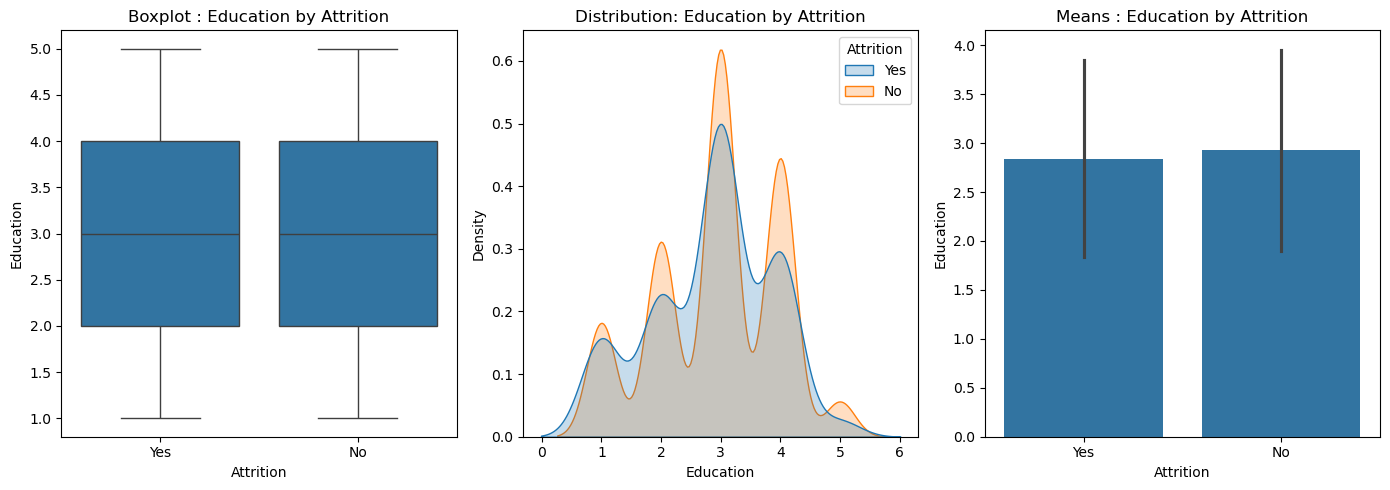

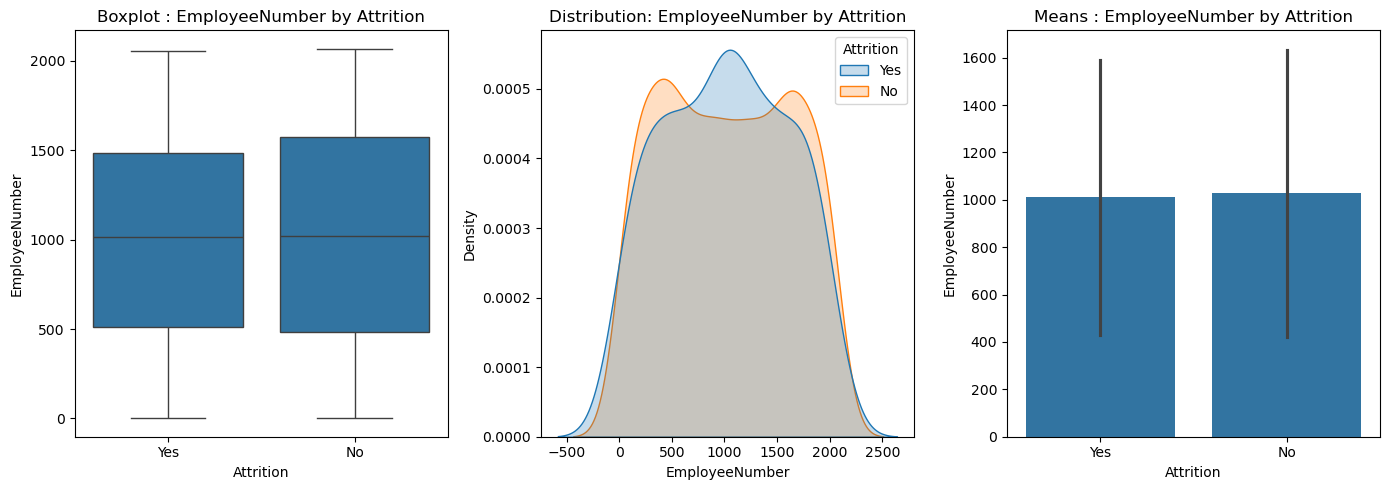

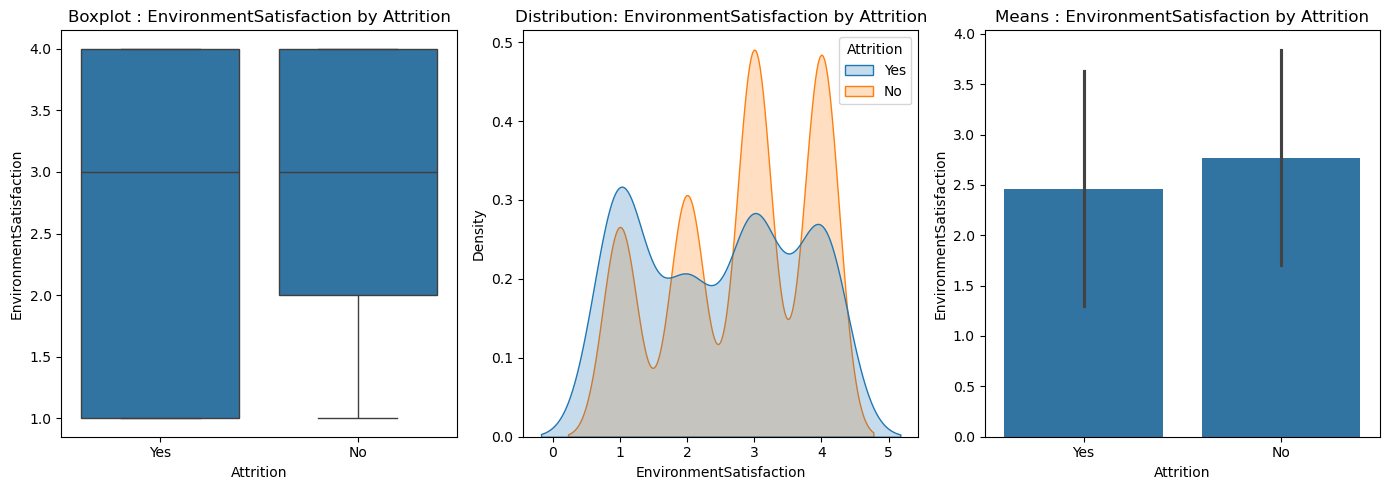

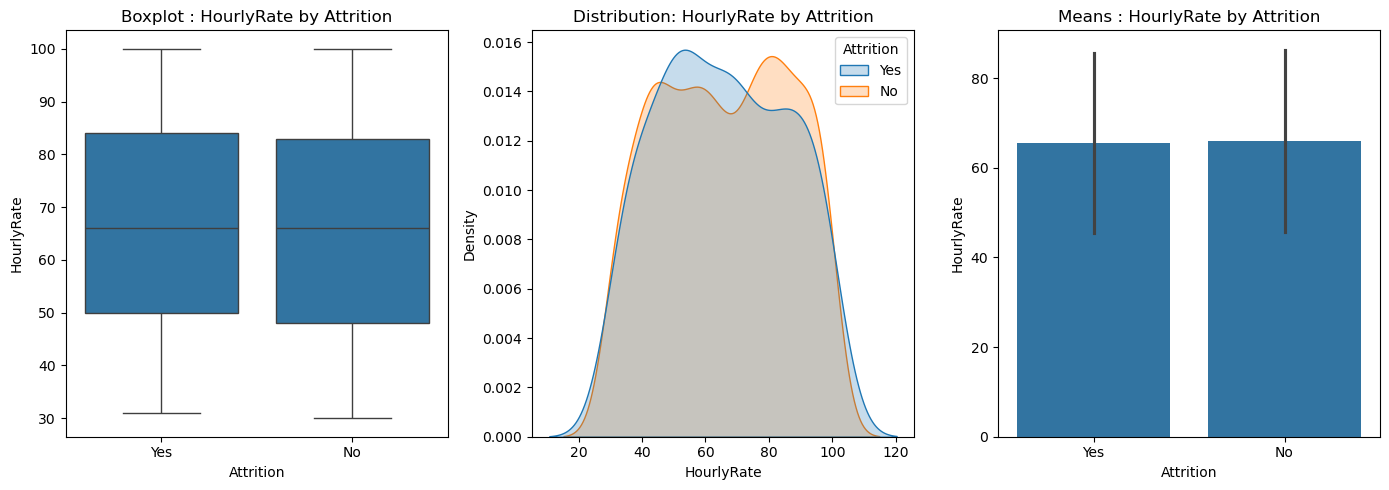

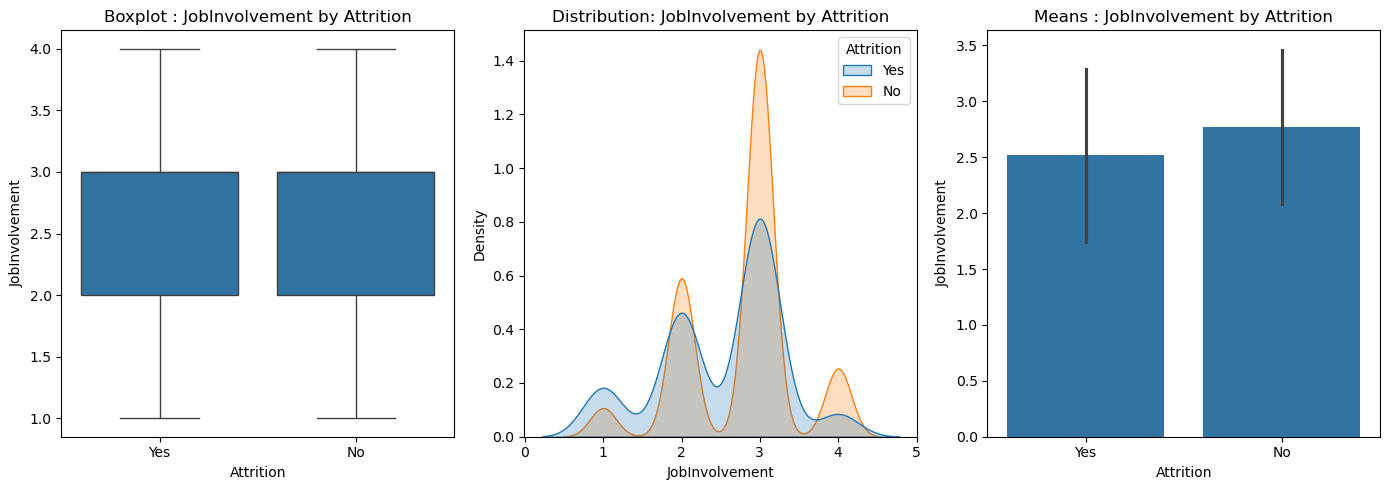

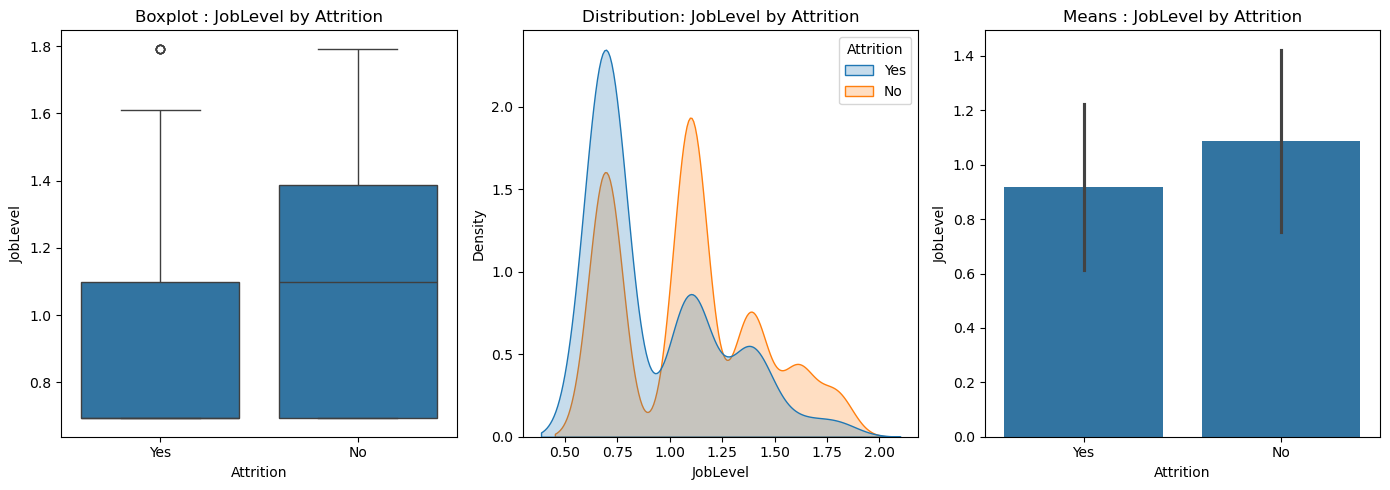

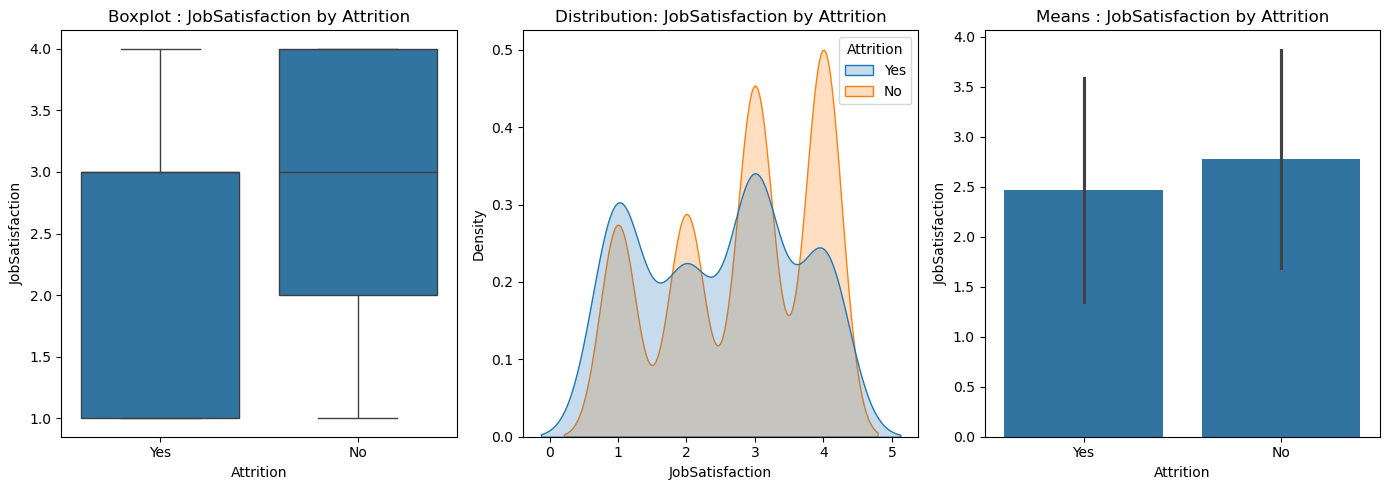

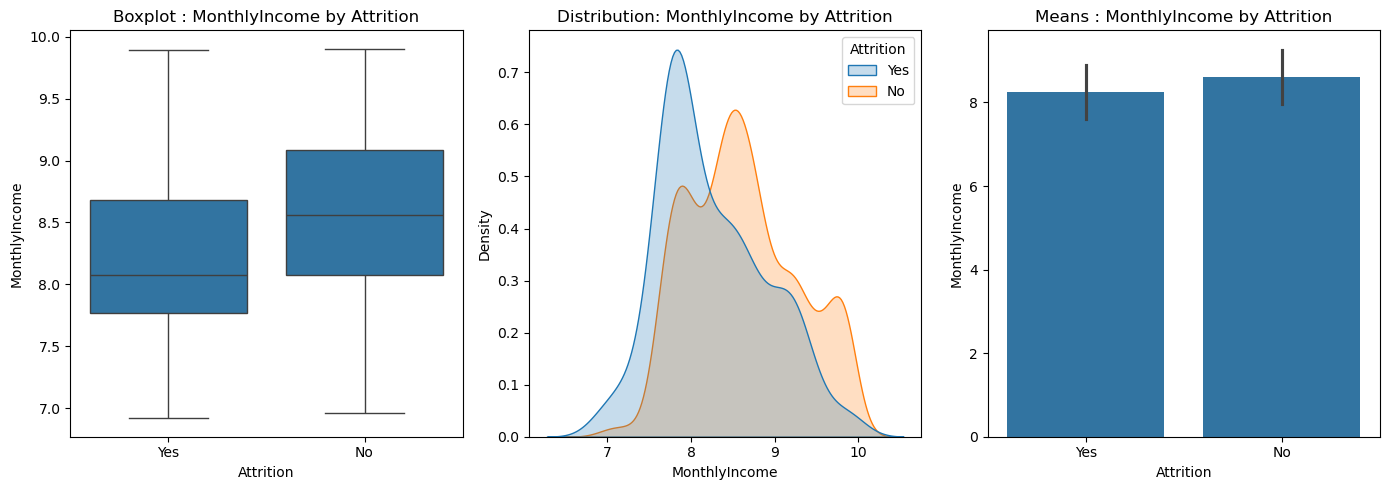

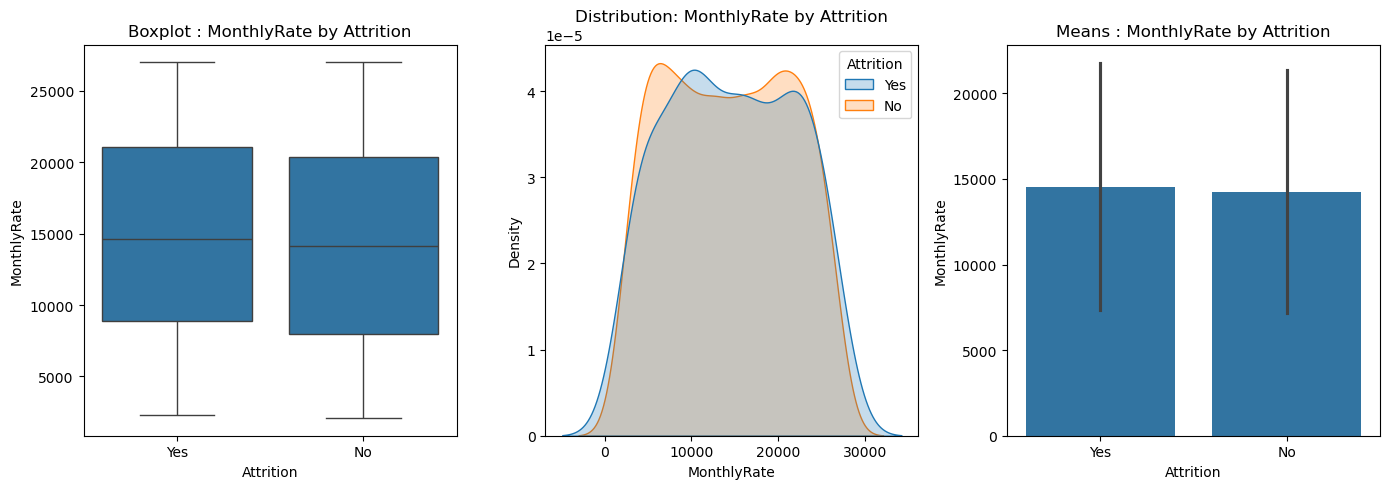

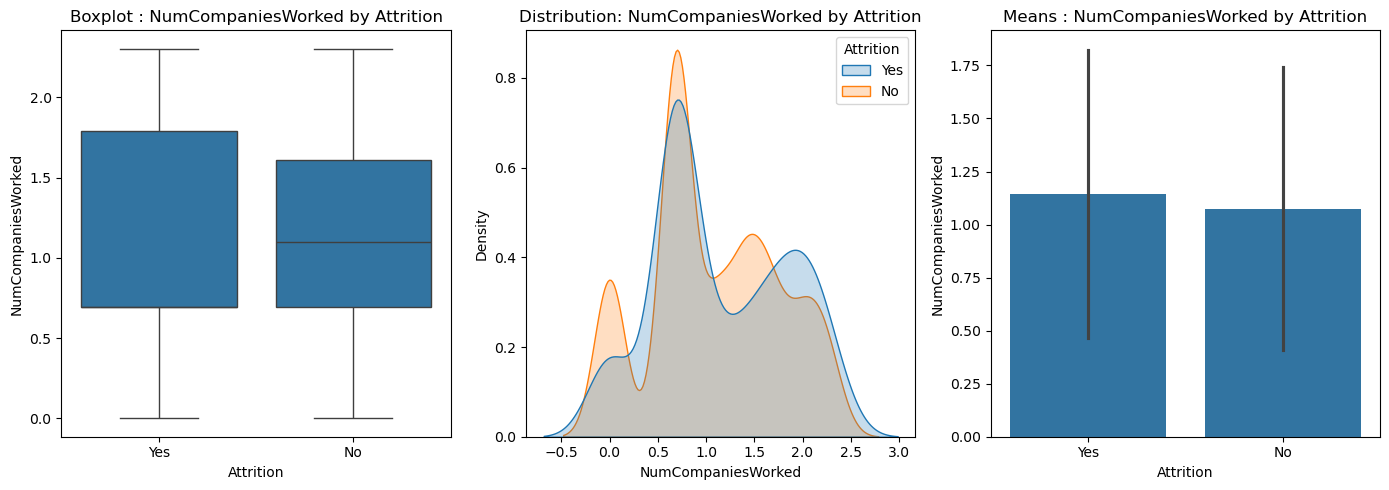

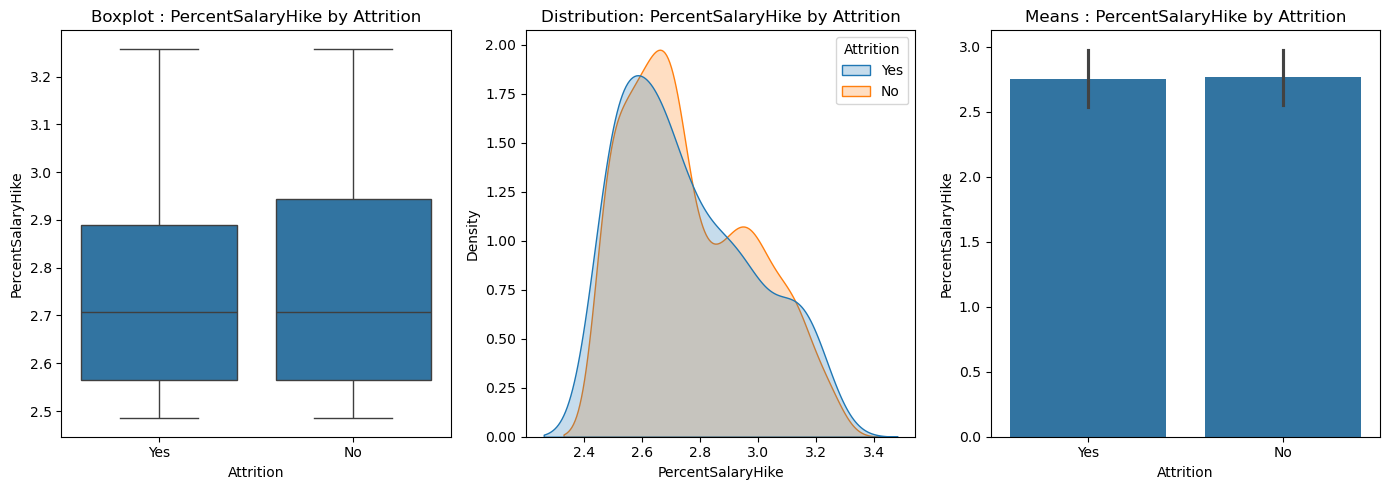

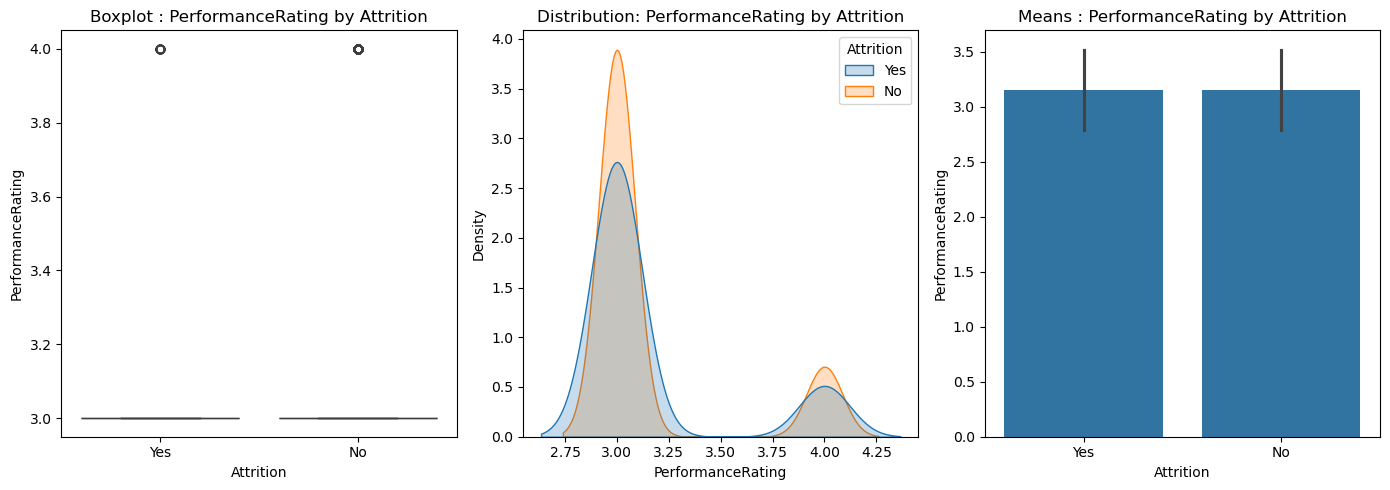

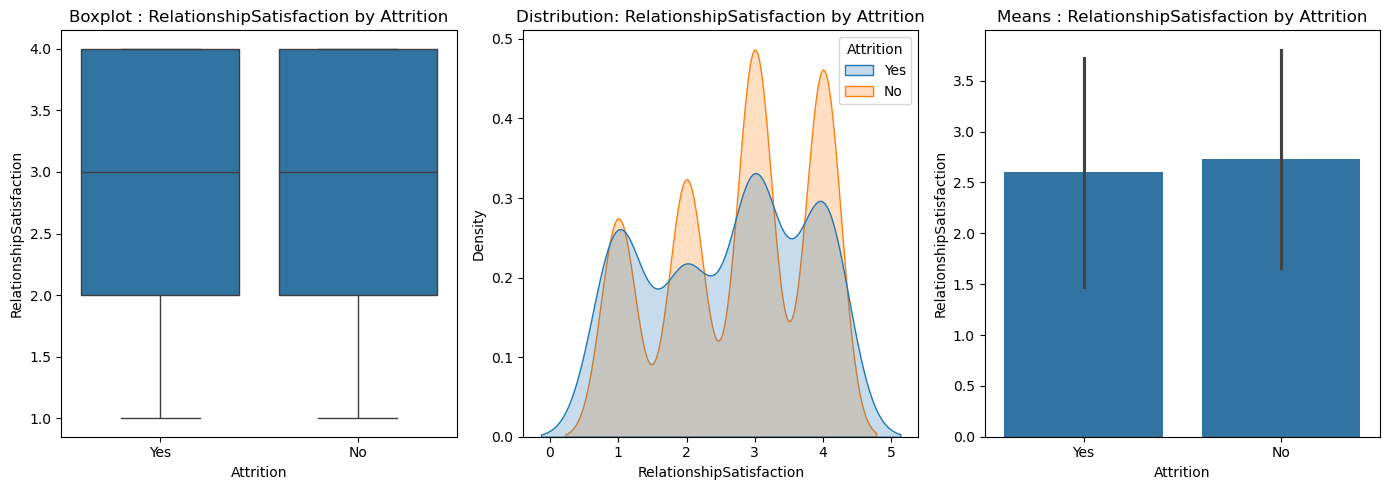

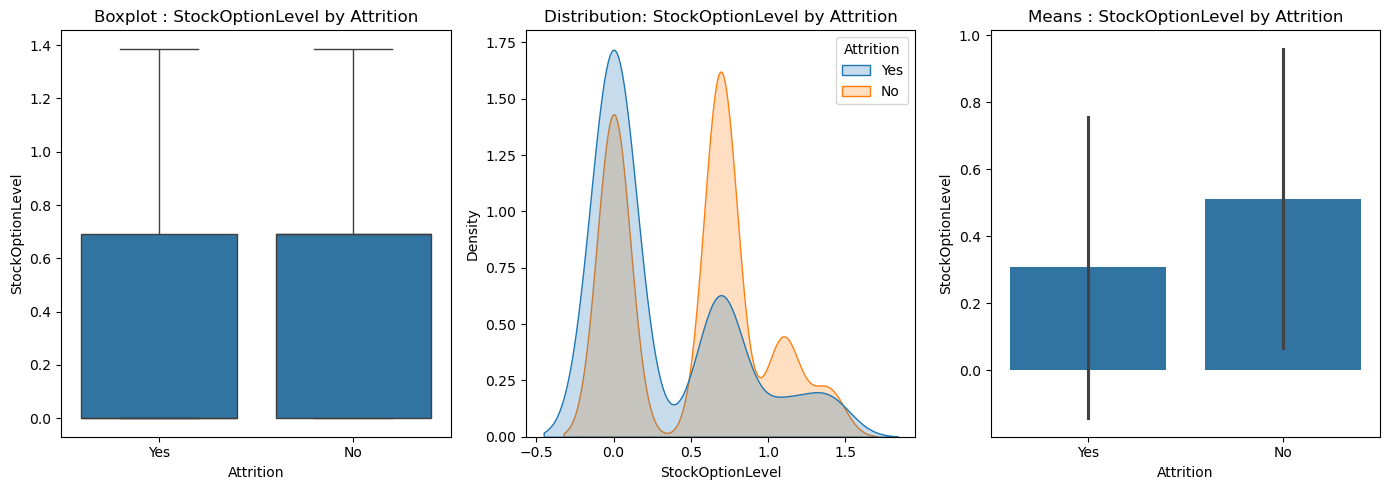

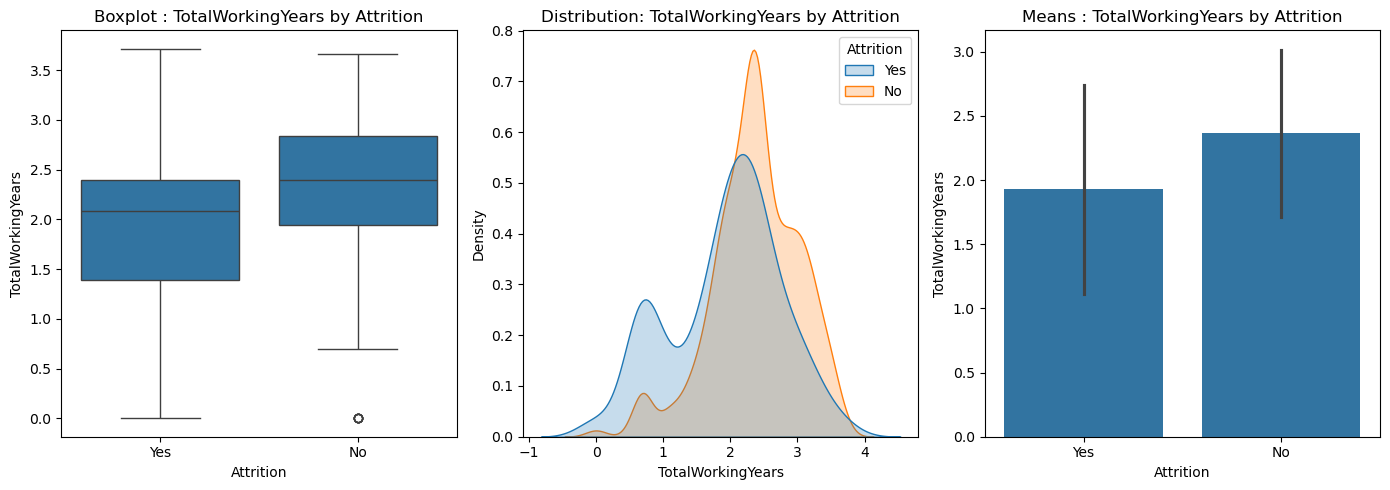

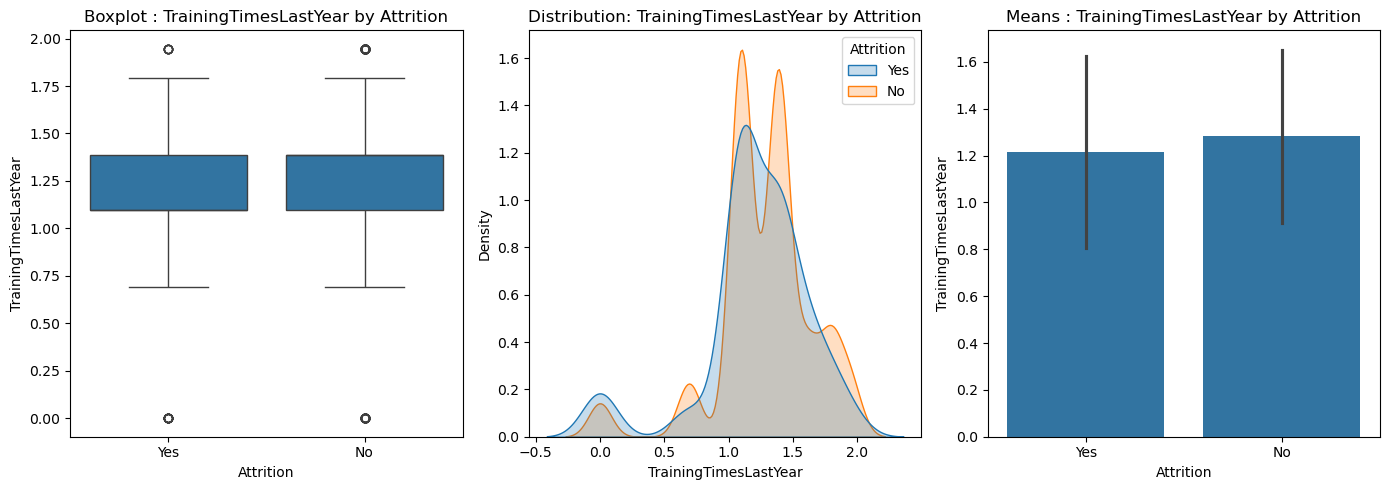

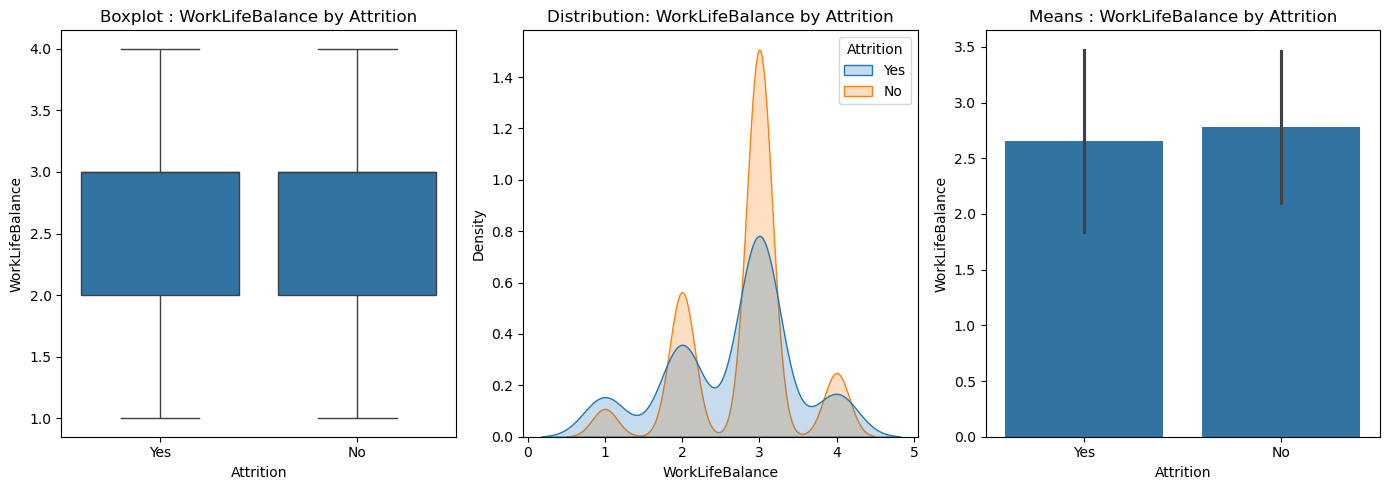

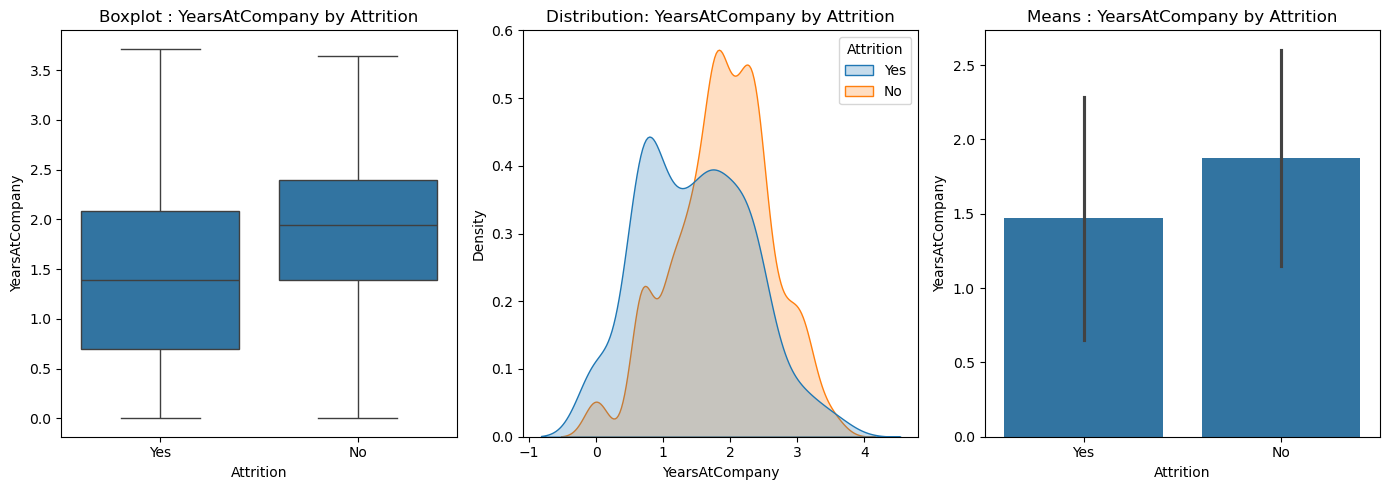

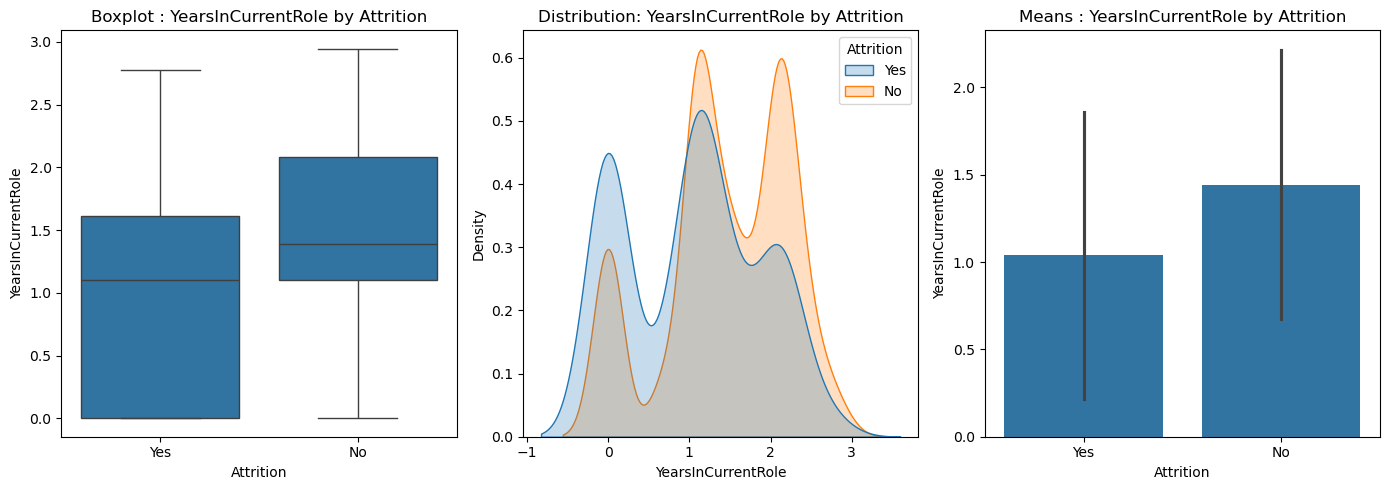

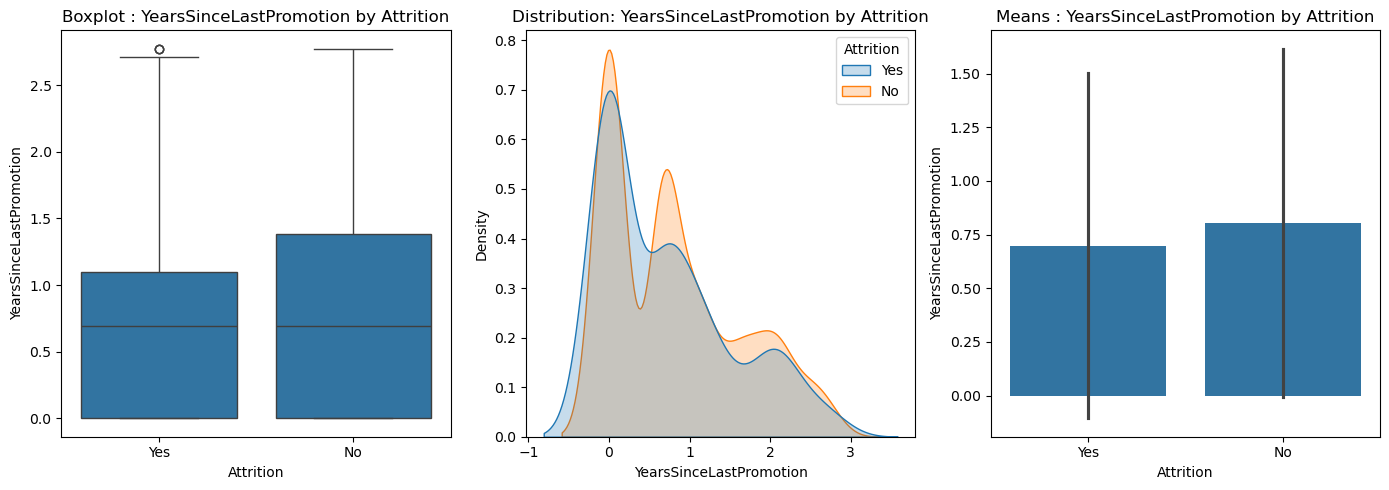

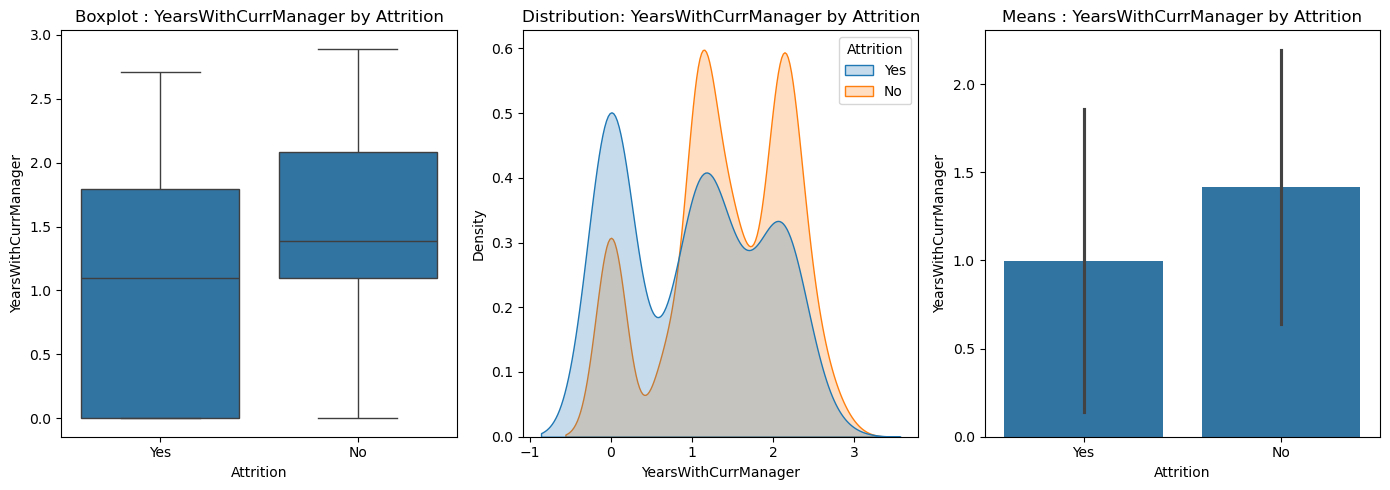

In [35]:
for featur in numerical:
    
    plt.figure(figsize=(14,5))
    
    # Visual: Box Plot to compare central tendency and spread
    plt.subplot(1,3,1)
    sns.boxplot(x='Attrition',y=featur,data=df)
    plt.title(f'Boxplot : {featur} by {'Attrition'}')

    # Visual: KDE Plot to compare distribution shapes
    plt.subplot(1,3,2)
    sns.kdeplot(x=featur,hue='Attrition',data=df,fill=True,common_norm=False)
    plt.title(f'Distribution: {featur} by {'Attrition'}')

    # Visual: Bar plot of means (useful for summary)
    plt.subplot(1,3,3)
    sns.barplot(x='Attrition',y=featur,data=df,estimator='mean',errorbar='sd')
    plt.title('Means : {} by {}'.format(featur,'Attrition'))

    plt.tight_layout()
    plt.show()

#### Encoding categorical variables

In [37]:
print('The following are the categorical features: \n \n{}'.format(categorical))

The following are the categorical features: 
 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [38]:
# Encoding categorical features through Label Encoder
le=LabelEncoder()

for column in categorical:
        df[column]=le.fit_transform(df[column])

In [39]:
# displaying the first 5 rows
df[categorical].head()

Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0          1               2           2               1       0        7   
1          0               1           1               1       1        6   
2          1               2           1               4       1        2   
3          0               1           1               1       0        6   
4          0               2           1               3       1        2   

   MaritalStatus  OverTime  
0              2         1  
1              1         0  
2              2         1  
3              1         1  
4              1         0

## Correlation Analysis

In [41]:
print(f'The following are the numerical features: \n \n{numerical}')

The following are the numerical features: 
 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [42]:
# calculating the correlation among the numerical features
numerical_correlation=df[numerical].corr()

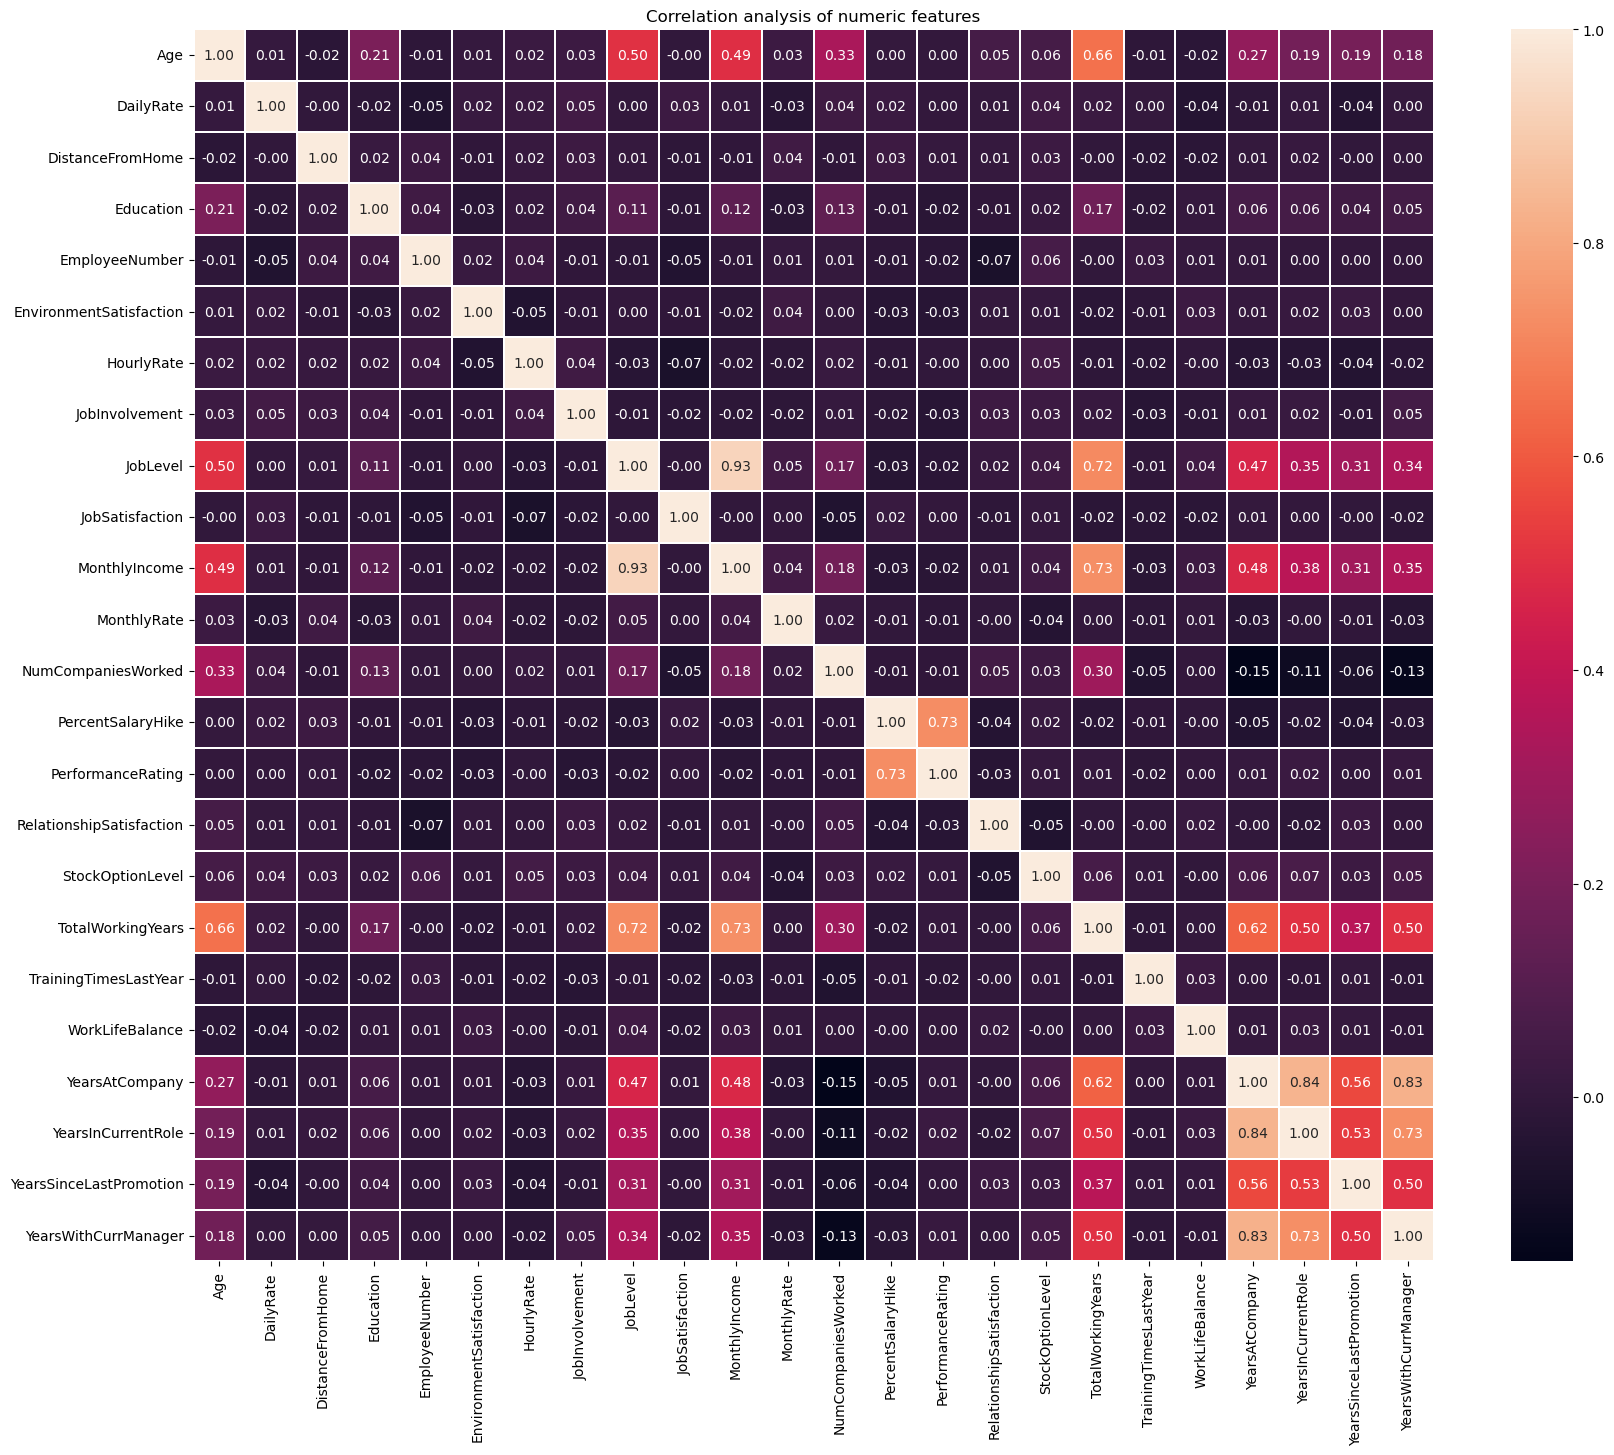

In [43]:
# displaying the correlation matrix using heatmap
plt.figure(figsize=(20,16))
sns.heatmap(numerical_correlation,annot=True,fmt='.2f',linecolor='white',linewidths=0.2)
plt.title('Correlation analysis of numeric features')
plt.show()

In [44]:
# calculating the correlation of all the features with the target
corr_with_target=df.corrwith(df['Attrition'])

In [45]:
print('Correlation coefficients of all the features with the target: \n \n{}'.format(corr_with_target))

Correlation coefficients of all the features with the target: 
 
Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.078073
Education                  -0.031373
EducationField              0.026846
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.186111
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.198201
MonthlyRate                 0.015170
NumCompaniesWorked          0.037844
OverTime                    0.246118
PercentSalaryHike          -0.017372
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.166288
TotalWorki

In [46]:
print(f'List of categorical features : \n{categorical}')

List of categorical features : 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [47]:
# calculating the correlation among the categorical features
categorical_correlation=df[categorical].corr()

In [48]:
# displaying the correlation matrix of categorical features
categorical_correlation

Attrition  BusinessTravel  Department  EducationField  \
Attrition        1.000000        0.000074    0.063991        0.026846   
BusinessTravel   0.000074        1.000000   -0.009044        0.023724   
Department       0.063991       -0.009044    1.000000        0.013720   
EducationField   0.026846        0.023724    0.013720        1.000000   
Gender           0.029453       -0.032981   -0.041583       -0.002504   
JobRole          0.067151        0.002724    0.662431        0.015599   
MaritalStatus    0.162070        0.024001    0.056073        0.014420   
OverTime         0.246118        0.016543    0.007481        0.002259   

                  Gender   JobRole  MaritalStatus  OverTime  
Attrition       0.029453  0.067151       0.162070  0.246118  
BusinessTravel -0.032981  0.002724       0.024001  0.016543  
Department     -0.041583  0.662431       0.056073  0.007481  
EducationField -0.002504  0.015599       0.014420  0.002259  
Gender          1.000000 -0.039723      -0.047183 -0.041924  
JobRole        -0.039723  1.000000       0.067957  0.040662  
MaritalStatus  -0.047183  0.067957       1.000000 -0.017521  
OverTime       -0.041924  0.040662      -0.017521  1.000000

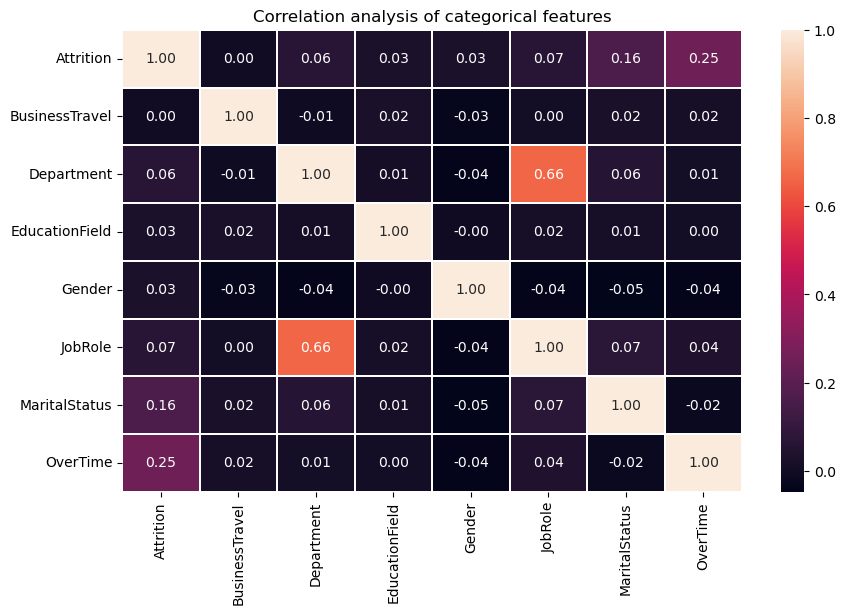

In [49]:
# visualizing the correlation matrix using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(categorical_correlation,annot=True,fmt='.2f',linecolor='white',linewidths=0.2)
plt.title('Correlation analysis of categorical features')
plt.show()

In [50]:
# dependant feature and independant features
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [51]:
# splitting the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
df_train=X_train.copy() # creating a new dataframe and copying the contents to it
df_train['Attrition']=y_train # adding the target variable back to the feature set

In [53]:
# displaying the first 5 rows
df_train.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
1097   24               2        350           1          3.091042          2   
727    18               0        287           1          1.791759          2   
254    29               2       1247           2          3.044522          2   
1175   39               2        492           1          2.564949          3   
1341   31               2        311           1          3.044522          3   

      EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
1097               5            1551                        3       1  ...   
727                1            1012                        2       1  ...   
254                2             349                        4       1  ...   
1175               3            1654                        4       1  ...   
1341               1            1881                        2       1  ...   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1097                         2          1.386294           1.098612   
727                          4          0.000000           0.000000   
254                          4          0.693147           2.397895   
1175                         3          0.000000           2.079442   
1341                         1          0.693147           2.397895   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1097               1.386294                3        0.693147   
727                1.098612                3        0.000000   
254                1.098612                3        1.386294   
1175               1.386294                3        1.791759   
1341               1.098612                3        2.397895   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1097            0.693147                 0.000000              0.000000   
727             0.000000                 0.000000              0.000000   
254             1.098612                 0.000000              1.098612   
1175            1.609438                 0.693147              0.000000   
1341            2.197225                 0.000000              1.098612   

      Attrition  
1097          0  
727           0  
254           0  
1175          0  
1341          0  

[5 rows x 32 columns]

## Information Value Analysis

In [55]:
# IV analysis procedure
def iv_calculation(df_train,feature,target):
    lst=[]
    if df_train[feature].nunique()>10: # checking that the number of unique values in the particular feature is greater than 10
        try:
            df_train['bin']=pd.qcut(df_train[feature],q=10,duplicates='drop') # performing quantile binning on a specific feature
        except: 
            df_train['bin']=pd.cut(df_train[feature],bins=5) # performing data binning on a specific feature

    else:
        df_train['bin']=df_train[feature]

    grouped=df_train.groupby('bin',observed=False)[target].agg(['count','sum']) #checking how the target variable behaves across different bins(by aggregating)
    grouped['non_event']=grouped['count']-grouped['sum'] # calculates number of non events
    grouped.rename(columns={'sum':'event'},inplace=True) # modifying the column name

    total_events=grouped['event'].sum() # calculating the total sum of events
    total_non_events=grouped['non_event'].sum() # calculating the total sum of non events

    if total_events==0 or total_non_events==0:
        return 0

    grouped['pc_event']=grouped['event']/total_events # creates a new column which represents the percentage of the particular event compared to the total events
    grouped['pc_non_event']=grouped['non_event']/total_non_events # creates a new column which represents the percentage of the particular non event compared to the total non events

    epsilon=1e-6
    grouped['woe']=np.log((grouped['pc_non_event']+epsilon)/(grouped['pc_event']+epsilon)) # calculates weight of evidence for a specific bin of a feature

    grouped['iv_of_bin']=(grouped['pc_non_event']-grouped['pc_event'])*grouped['woe'] # calculates the information value for each specific bin in a feature

    value_of_iv=grouped['iv_of_bin'].sum() # sums up the individual IV calculated for each bin

    df_train.drop(columns=['bin'],inplace=True)
    
    return value_of_iv

results_iv=[]

features=[col for col in df_train.columns if col!='Attrition'] # excluding the target variable



for feature in features:
    try:
        iv=iv_calculation(df_train,feature,'Attrition') # calling the iv_calculation function and passing the parameters

        predictive_power = "Useless"
        if iv >= 0.5: predictive_power = "Suspicious (>0.5)"
        elif iv >= 0.3: predictive_power = "Strong"
        elif iv >= 0.1: predictive_power = "Medium"
        elif iv >= 0.02: predictive_power = "Weak"
        
        
        results_iv.append({
            'Feature':feature,
            'IV':iv,
            'Power':predictive_power
        })

    except Exception as e:
        print(f'Could not calculate iv for {feature}:{e}')

df_iv=pd.DataFrame(results_iv) # converts results_iv into a structured dataframe
df_iv=df_iv.sort_values(by='IV',ascending=False).reset_index(drop=True) # sorts the dataframe with the IV values in the descending order

print('\nIV results')
print(df_iv)

print('\nInterpretations')
print('IV < 0.02   : Useless for prediction')
print('0.02 - 0.1  : Weak predictor')
print('0.1 - 0.3   : Medium predictor')
print('0.3 - 0.5   : Strong predictor')
print('IV > 0.5    : Suspicious(Check for overfitting or data leakage)')


IV results
                     Feature        IV              Power
0                    JobRole  0.562063  Suspicious (>0.5)
1                   OverTime  0.504997  Suspicious (>0.5)
2                   JobLevel  0.420676             Strong
3              MonthlyIncome  0.405032             Strong
4           StockOptionLevel  0.394411             Strong
5             YearsAtCompany  0.393358             Strong
6          TotalWorkingYears  0.348662             Strong
7         YearsInCurrentRole  0.327886             Strong
8                        Age  0.299225             Medium
9       YearsWithCurrManager  0.298657             Medium
10             MaritalStatus  0.287364             Medium
11        NumCompaniesWorked  0.126067             Medium
12            BusinessTravel  0.118816             Medium
13            JobInvolvement  0.105947             Medium
14     TrainingTimesLastYear  0.095563               Weak
15           JobSatisfaction  0.092939               Weak
16

#### It is better to drop the features whose IV < 0.02 as they do not contribute much for predicting the employee atrition.

In [57]:
# dropping the features whose IV values are <0.02
drop_list=df_iv[df_iv['IV']<0.02]['Feature'].to_list()

df_final=df_train.drop(columns=drop_list)

In [58]:
df_final.shape

(1176, 29)

In [59]:
df_final.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
1097   24               2        350           1          3.091042          2   
727    18               0        287           1          1.791759          2   
254    29               2       1247           2          3.044522          2   
1175   39               2        492           1          2.564949          3   
1341   31               2        311           1          3.044522          3   

      EducationField  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
1097               5            1551                        3          57   
727                1            1012                        2          73   
254                2             349                        4          45   
1175               3            1654                        4          66   
1341               1            1881                        2          89   

      ...  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
1097  ...           2.708050          1.386294           1.098612   
727   ...           2.772589          0.000000           0.000000   
254   ...           2.708050          0.693147           2.397895   
1175  ...           3.091042          0.000000           2.079442   
1341  ...           2.484907          0.693147           2.397895   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1097               1.386294                3        0.693147   
727                1.098612                3        0.000000   
254                1.098612                3        1.386294   
1175               1.386294                3        1.791759   
1341               1.098612                3        2.397895   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1097            0.693147                 0.000000              0.000000   
727             0.000000                 0.000000              0.000000   
254             1.098612                 0.000000              1.098612   
1175            1.609438                 0.693147              0.000000   
1341            2.197225                 0.000000              1.098612   

      Attrition  
1097          0  
727           0  
254           0  
1175          0  
1341          0  

[5 rows x 29 columns]

In [60]:
# calculating the correlation after the IV analysis
correlation_final=df_final.corr()

In [61]:
# displaying the correlation matrix
correlation_final

Age  BusinessTravel  DailyRate  Department  \
Age                      1.000000        0.030290   0.012482   -0.035998   
BusinessTravel           0.030290        1.000000  -0.004681   -0.009665   
DailyRate                0.012482       -0.004681   1.000000   -0.005083   
Department              -0.035998       -0.009665  -0.005083    1.000000   
DistanceFromHome        -0.025635       -0.017831   0.002989    0.005218   
Education                0.233764        0.028634  -0.047937   -0.007338   
EducationField          -0.020421        0.039307   0.056744    0.013672   
EmployeeNumber          -0.007333        0.001839  -0.061066   -0.013288   
EnvironmentSatisfaction  0.009879       -0.007403   0.003934   -0.028556   
HourlyRate               0.032259        0.024048   0.024225   -0.023503   
JobInvolvement           0.036590        0.026865   0.027444   -0.037263   
JobLevel                 0.507947       -0.012354   0.019523    0.159705   
JobRole                 -0.126442        0.003306  -0.033077    0.657255   
JobSatisfaction          0.000415       -0.023742   0.030794    0.023821   
MaritalStatus           -0.089228        0.051027  -0.068518    0.072433   
MonthlyIncome            0.502377        0.007575   0.026080    0.132497   
MonthlyRate              0.003540       -0.017259  -0.004193    0.020984   
NumCompaniesWorked       0.344161        0.028019   0.034708   -0.019881   
OverTime                 0.004569        0.013962   0.010604    0.001241   
PercentSalaryHike       -0.000145       -0.037029   0.029460   -0.011380   
StockOptionLevel         0.059464       -0.035330   0.037023   -0.013844   
TotalWorkingYears        0.667887        0.017691   0.024169   -0.009710   
TrainingTimesLastYear   -0.012035        0.048491   0.020390    0.049066   
WorkLifeBalance         -0.022859       -0.033124  -0.054233    0.044500   
YearsAtCompany           0.284581       -0.029109  -0.016806    0.016960   
YearsInCurrentRole       0.211956       -0.033988  -0.010316    0.046988   
YearsSinceLastPromotion  0.189156       -0.035998  -0.051093    0.032059   
YearsWithCurrManager     0.183072       -0.031925  -0.003802    0.026132   
Attrition               -0.153240        0.001522  -0.039971    0.067211   

                         DistanceFromHome  Education  EducationField  \
Age                             -0.025635   0.233764       -0.020421   
BusinessTravel                  -0.017831   0.028634        0.039307   
DailyRate                        0.002989  -0.047937        0.056744   
Department                       0.005218  -0.007338        0.013672   
DistanceFromHome                 1.000000   0.030920        0.025615   
Education                        0.030920   1.000000       -0.032406   
EducationField                   0.025615  -0.032406        1.000000   
EmployeeNumber                   0.031753   0.052979        0.000883   
EnvironmentSatisfaction         -0.015089  -0.024941        0.042246   
HourlyRate                       0.005972   0.010570       -0.024346   
JobInvolvement                   0.051240   0.048330       -0.018460   
JobLevel                         0.011532   0.103101       -0.019699   
JobRole                         -0.010939  -0.010512        0.015595   
JobSatisfaction                  0.011645  -0.000197       -0.045754   
MaritalStatus                   -0.015595   0.001744        0.003965   
MonthlyIncome                   -0.005635   0.115179       -0.015581   
MonthlyRate                      0.069198  -0.044339       -0.028568   
NumCompaniesWorked              -0.016948   0.139541        0.004631   
OverTime                         0.037302  -0.028630       -0.004633   
PercentSalaryHike                0.052796  -0.005942       -0.008944   
StockOptionLevel                 0.011350   0.014545       -0.020030   
TotalWorkingYears               -0.002500   0.182826        0.001036   
TrainingTimesLastYear           -0.025793  -0.022267        0.034571   
WorkLifeBalance      

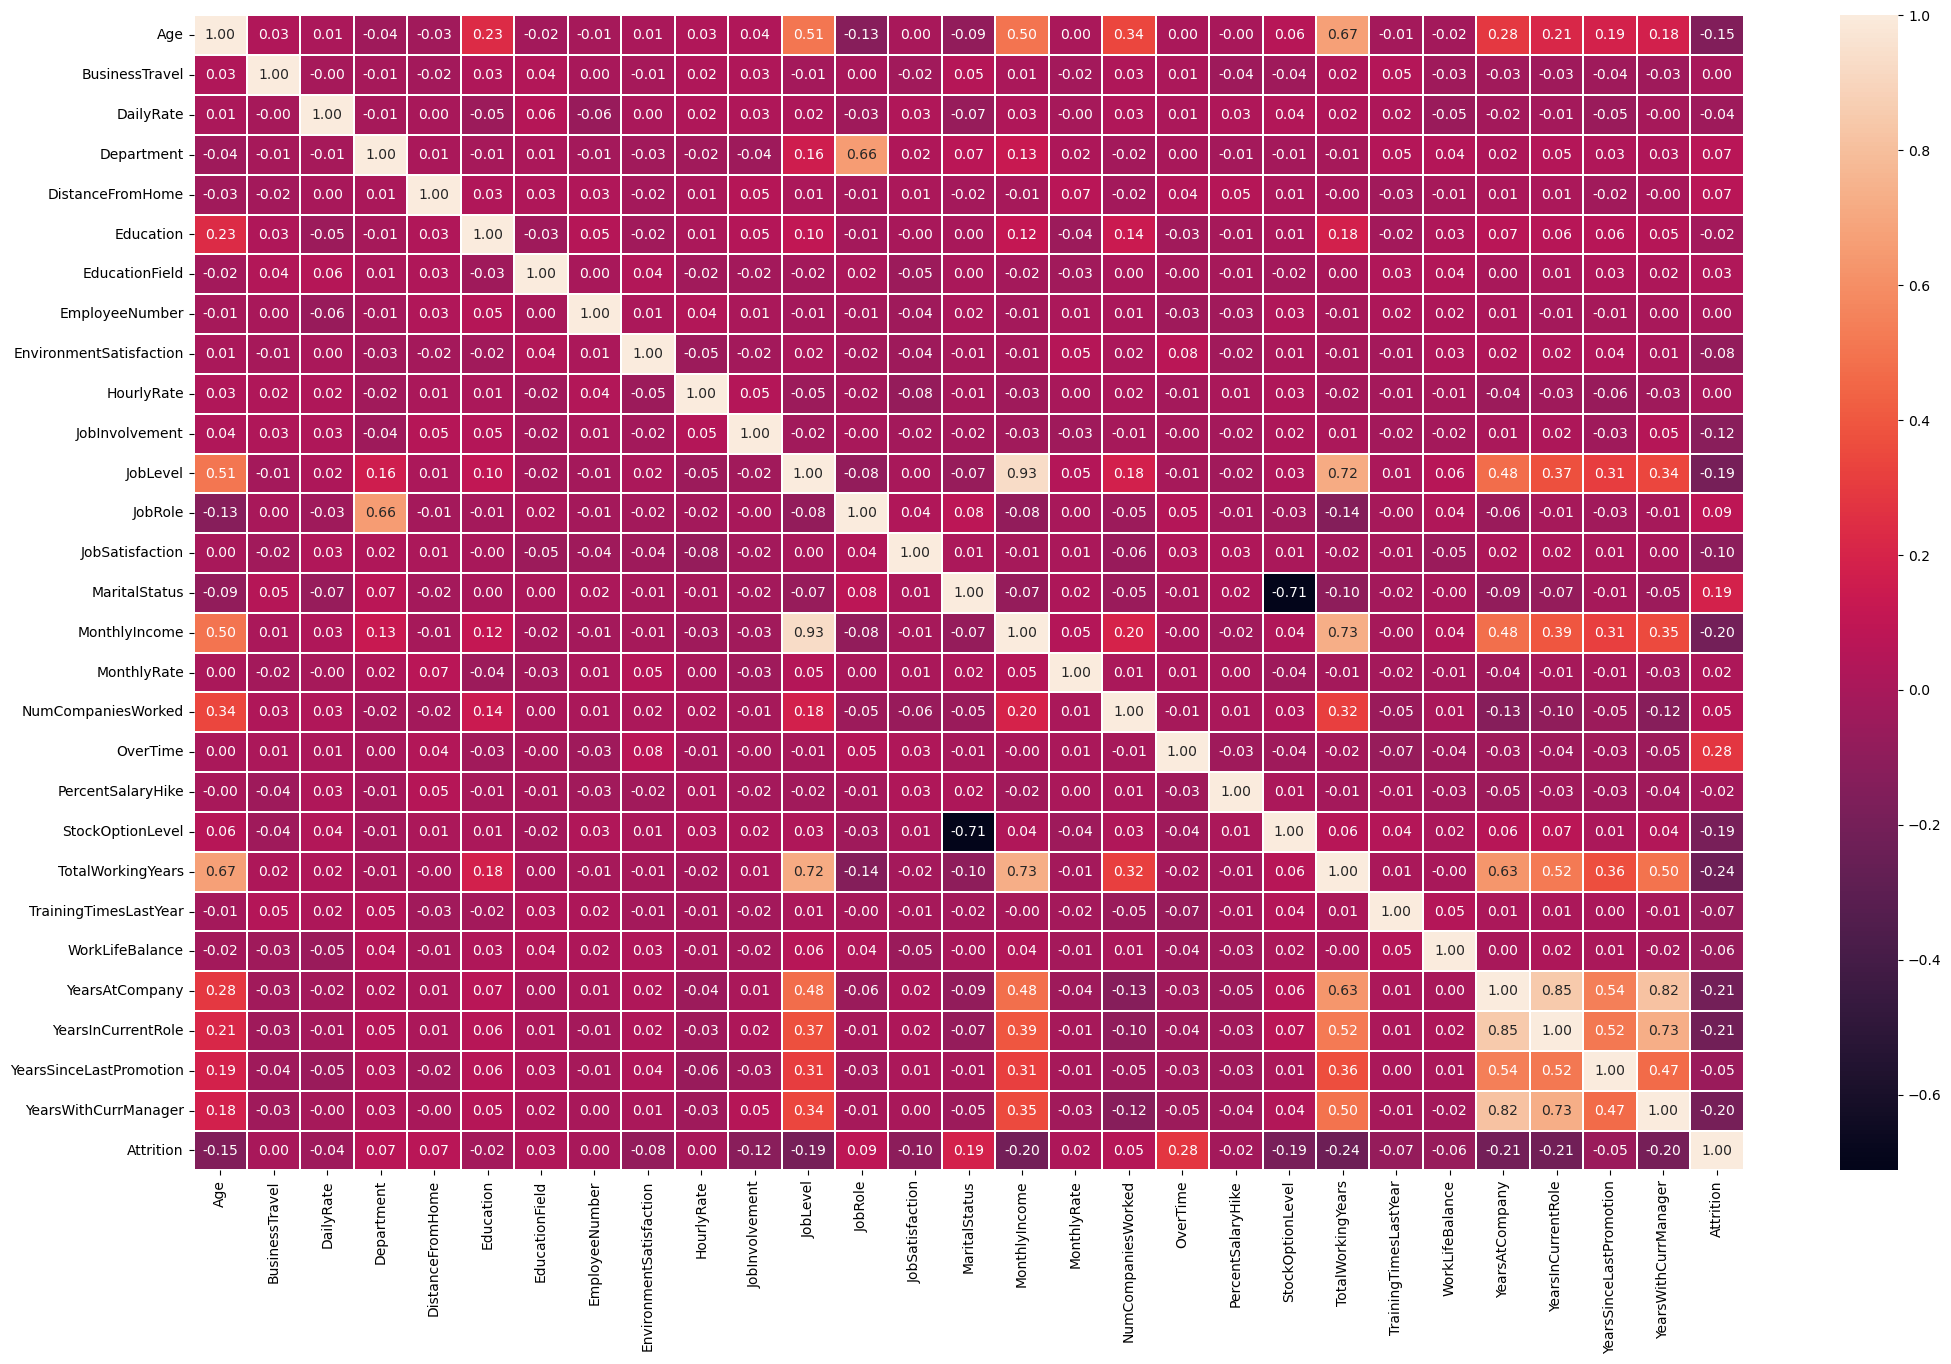

In [62]:
# visualizing the correlation matrix again after IV analysis
plt.figure(figsize=(25,15))
sns.heatmap(correlation_final,annot=True,fmt='.2f',linecolor='white',linewidths=0.2)
plt.show()

In [63]:
# seperating correlation pairs with correlation > 0.7 using a function 
def get_high_corr_pairs(df,threshold=0.7):
    corr_matrix=df_final.corr().abs() # Get absolute correlation
    columns=corr_matrix.columns
    high_corr_pairs=[]

    # Iterate through the columns
    for i in range(len(columns)):
        # Start j from i+1 to check only the upper triangle
        for j in range(i+1,len(columns)):

            # Access the correlation value
            corr_val=corr_matrix.iloc[i,j]

            # Check condition
            if corr_val>threshold:
                feature1=columns[i]
                feature2=columns[j]

                # Append a tuple: (Feature 1, Feature 2, Correlation Value)
                high_corr_pairs.append((feature1,feature2,corr_val))

    return high_corr_pairs

In [64]:
# displaying the pairs
pairs=get_high_corr_pairs(df_final)
print(pairs)

[('JobLevel', 'MonthlyIncome', 0.9310650976577405), ('JobLevel', 'TotalWorkingYears', 0.7184974720742364), ('MaritalStatus', 'StockOptionLevel', 0.7124363205303196), ('MonthlyIncome', 'TotalWorkingYears', 0.7319359600929992), ('YearsAtCompany', 'YearsInCurrentRole', 0.8468710525530453), ('YearsAtCompany', 'YearsWithCurrManager', 0.8164487163351782), ('YearsInCurrentRole', 'YearsWithCurrManager', 0.7291047860691118)]


I have displayed the feature pairs above with correlation coefficient > 0.7. It is a good choice to drop a few features in comparison with others on the basis of their IV values.

In [66]:
# dropping the columns with high correlation
df_final=df_final.drop(columns=['JobLevel','MaritalStatus','YearsInCurrentRole','YearsWithCurrManager'])

In [67]:
df_final.shape

(1176, 25)

In [68]:
df_final.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
1097   24               2        350           1          3.091042          2   
727    18               0        287           1          1.791759          2   
254    29               2       1247           2          3.044522          2   
1175   39               2        492           1          2.564949          3   
1341   31               2        311           1          3.044522          3   

      EducationField  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
1097               5            1551                        3          57   
727                1            1012                        2          73   
254                2             349                        4          45   
1175               3            1654                        4          66   
1341               1            1881                        2          89   

      ...  NumCompaniesWorked  OverTime  PercentSalaryHike  StockOptionLevel  \
1097  ...            0.000000         0           2.708050          1.386294   
727   ...            0.693147         0           2.772589          0.000000   
254   ...            1.098612         0           2.708050          0.693147   
1175  ...            1.609438         0           3.091042          0.000000   
1341  ...            0.693147         0           2.484907          0.693147   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1097           1.098612               1.386294                3   
727            0.000000               1.098612                3   
254            2.397895               1.098612                3   
1175           2.079442               1.386294                3   
1341           2.397895               1.098612                3   

      YearsAtCompany  YearsSinceLastPromotion  Attrition  
1097        0.693147                 0.000000          0  
727         0.000000                 0.000000          0  
254         1.386294                 0.000000          0  
1175        1.791759                 0.693147          0  
1341        2.397895                 0.000000          0  

[5 rows x 25 columns]

In [69]:
# frequency distribution of the target
df_final['Attrition'].value_counts()

Attrition
0    978
1    198
Name: count, dtype: int64

## Pipeline Implementation and Parameter Tuning

In [71]:
# pipeline which chains data preprocessing and model training together into a single object
pipeline=Pipeline([
    ('ss',StandardScaler()),
    ('smote',SMOTE(random_state=42)),
    ('classifier',LogisticRegression())
])


# defining the hyper parameters
param_grid=[
    {
    
        'classifier':[LogisticRegression()],
        'smote__random_state':[42],
        'classifier__C':[np.arange(1.0,10.0)],
        'classifier__random_state':[42],
        'classifier__solver':['lbfgs','liblinear'],
        'classifier__class_weight':['balanced']
                      
    },
    {
        'classifier':[KNeighborsClassifier()],
        'smote__random_state':[42],
        'classifier__n_neighbors':[range(5,50,5)],
        'classifier__weights':['uniform'],
        'classifier__p':[2]
    },
    {
        'classifier':[SVC()],
        'smote__random_state':[42],
        'classifier__C':[np.arange(1.0,10.0)],
        'classifier__class_weight':['balanced'],
        'classifier__kernel':['rbf','sigmoid'],
        'classifier__gamma':['scale','auto'],
        'classifier__probability':[True]
    },
    {
        'classifier':[DecisionTreeClassifier()],
        'smote__random_state':[42],
        'classifier__criterion':['gini','entropy'],
        'classifier__splitter':['best','random'],
        'classifier__max_depth':[5,10,15],
        'classifier__random_state':[42]
    },
    {
        'classifier':[RandomForestClassifier()],
        'smote__random_state':[42],
        'classifier__n_estimators':[range(100,500,5)],
        'classifier__criterion':['gini','entropy'],
        'classifier__max_depth':[5,10,15],
        'classifier__class_weight':['balanced']
    },
    {
        'classifier':[BernoulliNB()],
        'smote__random_state':[42],
        'classifier__alpha':[np.arange(1.0,10.0)]
    },
    {
        'classifier':[GradientBoostingClassifier()],
        'smote__random_state':[42],
        'classifier__loss':['log_loss','exponential'],
        'classifier__learning_rate':[0.001,0.01,0.1],
        'classifier__n_estimators':[range(100,500,5)],
        'classifier__max_depth':[3,5,10,15]
    },
    {
        'classifier':[LGBMClassifier()],
        'smote__random_state':[42],
        'classifier__num_leaves':[32],
        'classifier__max_depth':[5],
        'classifier__verbose':[-1]
    },
    {
        'classifier':[XGBClassifier()],
        'smote__random_state':[42],
        'classifier__max_depth':[6,10,15],
        'classifier__gamma':[range(1,25)]
    },
    {
        'classifier':[HistGradientBoostingClassifier()],
        'smote__random_state':[42],
        'classifier__loss':['log_loss'],
        'classifier__learning_rate':[0.001,0.01,0.1],
        'classifier__max_depth':[5,10,15],
        'classifier__random_state':[42]
                        
    }
]

In [72]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

In [73]:
y_pred=pipeline.predict(X_test)

In [74]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
# applying randomized search cv with scoring parameter as roc_auc
for name in pipeline:
    rsearch=RandomizedSearchCV(pipeline,param_grid,random_state=42,cv=10,n_iter=10,n_jobs=-1,scoring='roc_auc')
    rsearch.fit(X_train,y_train)
    rs_best_score=rsearch.best_score_
    rs_best_parameters=rsearch.best_params_
    rs_best_pipeline=rsearch.best_estimator_

print(f'Best CV roc auc score is : {rs_best_score:.4f}\n')
print(f'Best parameters : {rs_best_parameters}\n')
print(f'Best model: {rs_best_pipeline}\n')

Best CV roc auc score is : 0.8115

Best parameters : {'smote__random_state': 42, 'classifier__random_state': 42, 'classifier__max_depth': 10, 'classifier__loss': 'log_loss', 'classifier__learning_rate': 0.1, 'classifier': HistGradientBoostingClassifier()}

Best model: Pipeline(steps=[('ss', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 HistGradientBoostingClassifier(max_depth=10,
                                                random_state=42))])



In [76]:
y_pred_best=rs_best_pipeline.predict(X_test)
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred_best)))

Accuracy score : 0.8843537414965986


In [77]:
confusion_mat=confusion_matrix(y_test,y_pred_best)

print('Confusion matrix is :\n')
confusion_mat

Confusion matrix is :



array([[247,   8],
       [ 26,  13]], dtype=int64)

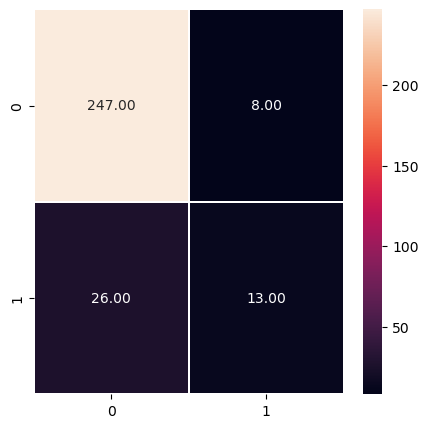

In [78]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_mat,annot=True,fmt='.2f',linecolor='white',linewidths=0.2)
plt.show()

In [79]:
classification_rep=classification_report(y_test,y_pred_best)
print('Classification report is :\n')
print(classification_rep)

Classification report is :

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       255
           1       0.62      0.33      0.43        39

    accuracy                           0.88       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.87      0.88      0.87       294



In [80]:
y_pred_proba_best=rs_best_pipeline.predict_proba(X_test)[:,1]

print('Test ROC AUC score is : {}'.format(roc_auc_score(y_test,y_pred_proba_best)))

Test ROC AUC score is : 0.8013071895424837


<Figure size 500x500 with 0 Axes>

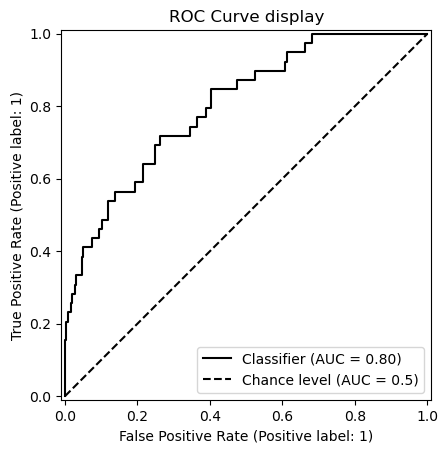

In [81]:
# plotting the roc curve
plt.figure(figsize=(5,5))
RocCurveDisplay.from_predictions(y_test,y_pred_proba_best,plot_chance_level=True,color='black')
plt.title('ROC Curve display')
plt.show()